In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0, '/home/knight/matar/PYTHON/ECOGpy/pacpy')
#sys.path.insert(0, '/home/knight/matar/PYTHON/ECOGpy/ecogtools')
sys.path.insert(0, '/home/knight/matar/PYTHON/ECOGpy/')


In [3]:
import pandas as pd
import os
from scipy import stats
from utils import loadmat
%pylab inline
import scipy.io as spio
import matplotlib.gridspec as gridspec
from __future__ import division
from utils.get_ROI import get_ROI

Populating the interactive namespace from numpy and matplotlib


In [4]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
savedir = os.path.join(SJdir, 'PCA', 'Figures')
savedir

'/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Figures'

In [5]:
base ='/home/knight/matar/MATLAB/DATA/Avgusta/'


In [22]:
# calculate percentages
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)
print 'R %.2f percent of active elecs' %(sum(df.pattern == 'R')/df.shape[0] * 100)
print 'D %.2f percent of active elecs' %(sum(df.pattern == 'D')/df.shape[0] * 100)
print 'S %.2f percent of active elecs' %(sum(df.pattern == 'S')/df.shape[0] * 100)
print 'SR %.2f percent of active elecs' %(sum(df.pattern == 'SR')/df.shape[0] * 100)
print 'sustained %.2f percent of active elecs' %(sum(df.pattern == 'sustained')/df.shape[0] * 100)

R 29.93 percent of active elecs
D 32.65 percent of active elecs
S 12.93 percent of active elecs
SR 23.13 percent of active elecs
sustained 1.36 percent of active elecs


In [11]:
# calculate percentage of active elecs in L vs R
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)
ROIs = np.unique(df.ROI)
right = [roi for roi in ROIs if roi[0] == 'R']
left = [roi for roi in ROIs if roi not in right]

print '% of active elecs in R hemisphere : {0}'.format((sum(df.ROI.isin(right))/df.ROI.shape))
print '% of active elecs in L hemisphere : {0}'.format((sum(df.ROI.isin(left))/df.ROI.shape))


% of active elecs in R hemisphere : [ 0.18095238]
% of active elecs in L hemisphere : [ 0.81904762]


In [14]:
print df.ROI.isin(right).sum()
print df.ROI.isin(left).sum()

133
602


In [491]:
tmp = df.groupby(['subj', 'elec']).count().task
tmp.reset_index().

(735, 17)

In [17]:
#full coverage (all recorded)
df = pd.read_csv(os.path.join(SJdir, 'Subjs','coverage_allelecs.csv'))
brainROI = loadmat.loadmat('/home/knight/matar/MATLAB/DATA/Avgusta/ROIs/brain_ROI.mat')

df.loc[(df.subj == 'CP7'), 'ROI'] =  df[df.subj == 'CP7'].apply(lambda x: get_ROI('CP7', x.elec, brainROI), axis = 1)
df.loc[(df.subj == 'CP9'), 'ROI'] =  df[df.subj == 'CP9'].apply(lambda x: get_ROI('CP9', x.elec, brainROI), axis = 1)
df.to_csv(os.path.join(SJdir, 'Subjs','coverage_allelecs.csv')) #update with CP9 and CP7

#remove ununused elecs
tmp = df[~(df.subj.isin(['GP44','ST28','GP27', 'ST13', 'GP35_face']))].copy()

In [21]:
subjs = list(df.subj.unique())
#subjs.remove('GP35')
#subjs.extend(['GP35_face', 'GP35_words'])
subjs

['CP7',
 'CP9',
 'GP15',
 'GP27',
 'GP28',
 'GP35_face',
 'GP35_words',
 'GP44',
 'JH10',
 'JH17',
 'JH2',
 'JH5',
 'JH6',
 'ST1',
 'ST13',
 'ST15',
 'ST27',
 'ST28',
 'ST32',
 'ST4',
 'ST6']

In [50]:
sum([len(brain_ROI[s][k]) for k in brain_ROI[s].keys() if k in left])

TypeError: object of type 'int' has no len()

In [93]:
for r in df.groupby(['subj','task']).mean().index:
    s, t = r
print (s,t)

('ST6', 'SelfVis')


In [38]:
reconlist = pd.read_csv(os.path.join(base, 'PCA','reconlist.csv'))
reconlist_pruned = pd.read_csv(os.path.join(base, 'PCA','reconlist_pruned.csv'))

In [55]:
np.setdiff1d(reconlist.subj_task, reconlist_pruned.subj_task)

array(['GP27_EmoRep', 'GP27_SelfAud', 'GP44_DecisionAud',
       'ST28_DecisionVis', 'ST33_DecisionAud'], dtype=object)

In [59]:
for r in df.groupby(['subj','task']).mean().index:
    s, t = r
    if '_'.join([s,t]) not in reconlist_pruned.subj_task.values:
        print (s,t)
        
for r in reconlist_pruned.subj_task.values:
    s, t = r.split('_')
    tmp = df[(df.subj == s) & (df.task == t)]
    if len(tmp) == 0:
        print (s, t)
[]        

('JH2', 'EmoRep')
('JH2', 'FaceGen')
('JH6', 'EmoRep')
('JH6', 'FaceGen')
('ST1', 'EmoRep')
('ST1', 'FaceEmo')
('ST1', 'FaceGen')
('GP28', 'EmoRep')


[]

In [76]:
#elec_dict = {}
for r in reconlist_pruned.subj_task.values:
    subj, task = r.split('_')
    if subj in ['ST27','ST32','CP9','CP7']:
        num_elecs = 0
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'subj_globals.mat')
        data_dict = spio.loadmat(filename)
        num_elecs = data_dict['elecs'][0].shape[0]
    else:
        continue
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'gdat_notch.mat')
        data_dict = spio.loadmat(filename)
        gdat = data_dict['gdat']

        num_elecs = sum(gdat[:,1]!=0)
    elec_dict['_'.join([subj, task])] = num_elecs
    print (subj, task, num_elecs)

('ST27', 'DecisionVis', 81)
('CP7', 'DecisionAud', 108)
('CP9', 'DecisionAud', 97)
('ST32', 'DecisionVis', 80)


In [78]:
elec_dict

{'CP7_DecisionAud': 108,
 'CP9_DecisionAud': 97,
 'GP15_EmoGen': 74,
 'GP15_EmoRep': 74,
 'GP15_FaceEmo': 74,
 'GP15_FaceGen': 74,
 'GP15_SelfAud': 74,
 'GP15_SelfVis': 73,
 'GP28_EmoRep': 60,
 'GP28_SelfAud': 60,
 'GP28_SelfVis': 59,
 'GP35_EmoGen': 63,
 'GP35_EmoRep': 63,
 'GP35_FaceEmo': 61,
 'GP35_FaceGen': 60,
 'JH10_EmoRep': 90,
 'JH10_SelfAud': 87,
 'JH17_EmoRep': 99,
 'JH17_SelfAud': 99,
 'JH17_SelfVis': 99,
 'JH2_EmoGen': 103,
 'JH2_EmoRep': 106,
 'JH2_FaceEmo': 106,
 'JH2_FaceGen': 106,
 'JH2_SelfAud': 106,
 'JH2_SelfVis': 103,
 'JH5_EmoRep': 62,
 'JH6_EmoRep': 89,
 'JH6_FaceEmo': 89,
 'JH6_FaceGen': 89,
 'JH6_SelfAud': 89,
 'ST15_EmoRep': 104,
 'ST15_SelfAud': 104,
 'ST1_EmoGen': 70,
 'ST1_EmoRep': 67,
 'ST1_FaceEmo': 69,
 'ST1_FaceGen': 69,
 'ST1_SelfAud': 67,
 'ST27_DecisionVis': 81,
 'ST32_DecisionVis': 80,
 'ST4_EmoRep': 90,
 'ST4_SelfAud': 87,
 'ST6_EmoRep': 74,
 'ST6_SelfAud': 74,
 'ST6_SelfVis': 74}

In [77]:
sum(elec_dict.values())

3706

In [81]:
pd.DataFrame(elec_dict, index = range(len(data_dict.keys())))

,CP7_DecisionAud,CP9_DecisionAud,GP15_EmoGen,GP15_EmoRep,GP15_FaceEmo,GP15_FaceGen,GP15_SelfAud,GP15_SelfVis,GP28_EmoRep,GP28_SelfAud,...,ST1_FaceEmo,ST1_FaceGen,ST1_SelfAud,ST27_DecisionVis,ST32_DecisionVis,ST4_EmoRep,ST4_SelfAud,ST6_EmoRep,ST6_SelfAud,ST6_SelfVis
0,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74
1,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74
2,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74
3,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74
4,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74
5,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74
6,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74
7,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74
8,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74
9,108,97,74,74,74,74,74,73,60,60,...,69,69,67,81,80,90,87,74,74,74


In [34]:
skipped = [('JH2', 'EmoRep'), ('JH2', 'FaceGen'), ('JH6', 'EmoRep'), ('JH6', 'FaceGen'), ('ST1', 'EmoRep'), ('ST1', 'FaceEmo'), ('ST1', 'FaceGen'), ('GP28', 'EmoRep')]
for i in skipped:
    s, t = i
    data_dict = spio.loadmat(os.path.join(base, 'Subjs', s, t, 'HG_elecMTX_percent.mat'))    
    tmp = data_dict['data_percent']
    print (s, t, tmp.shape)

('JH2', 'EmoRep', (22, 83, 2125))
('JH2', 'FaceGen', (15, 132, 1754))
('JH6', 'EmoRep', (25, 73, 2264))
('JH6', 'FaceGen', (20, 133, 1675))
('ST1', 'EmoRep', (7, 136, 2933))
('ST1', 'FaceEmo', (4, 137, 2297))
('ST1', 'FaceGen', (4, 115, 2312))
('GP28', 'EmoRep', (38, 169, 2071))


In [98]:
# #all recorded elecs in left vs right vs total
l = ([[k for k in brain_ROI[s].keys()] for s in subjs])
ROIs = unique([item for sublist in l for item in sublist])
right = [roi for roi in ROIs if roi[0] == 'R']
left = [roi for roi in ROIs if roi not in right]

cnt = 0
for r in df.groupby(['subj','task']).mean().index:
    s, t = r
    if (s=='GP35') & ('Face' in t):
        s+='_face'
    elif (s=='GP35'):
        s+='_words'
    for k in brain_ROI[s].keys():
        if k in right:
            try:
                cnt+=len(brain_ROI[s][k])
            except TypeError: #just 1 num
                cnt+=1

print cnt

cnt = 0
for r in df.groupby(['subj','task']).mean().index:
    s, t = r
    if (s=='GP35') & ('Face' in t):
        s+='_face'
    elif (s=='GP35'):
        s+='_words'
    for k in brain_ROI[s].keys():
        if k in left:
            try:
                cnt+=len(brain_ROI[s][k])
            except TypeError: #just 1 num
                cnt+=1     
print cnt

cnt = 0
for r in df.groupby(['subj','task']).mean().index:
    s, t = r
    if (s=='GP35') & ('Face' in t):
        s+='_face'
    elif (s=='GP35'):
        s+='_words'
    for k in brain_ROI[s].keys():
        try:
            cnt+=len(brain_ROI[s][k])
        except TypeError: #just 1 num
            cnt+=1
print cnt


GP35_words
GP35_words
GP35_face
GP35_face
750
2285
3035


In [4]:
cnt = 0
for p in ['S','R','SR','D','sustained']:
    cnt += sum(df.pattern == p)/df.shape[0]
cnt

NameError: name 'df' is not defined

/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Figures


/srv/local/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:37: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


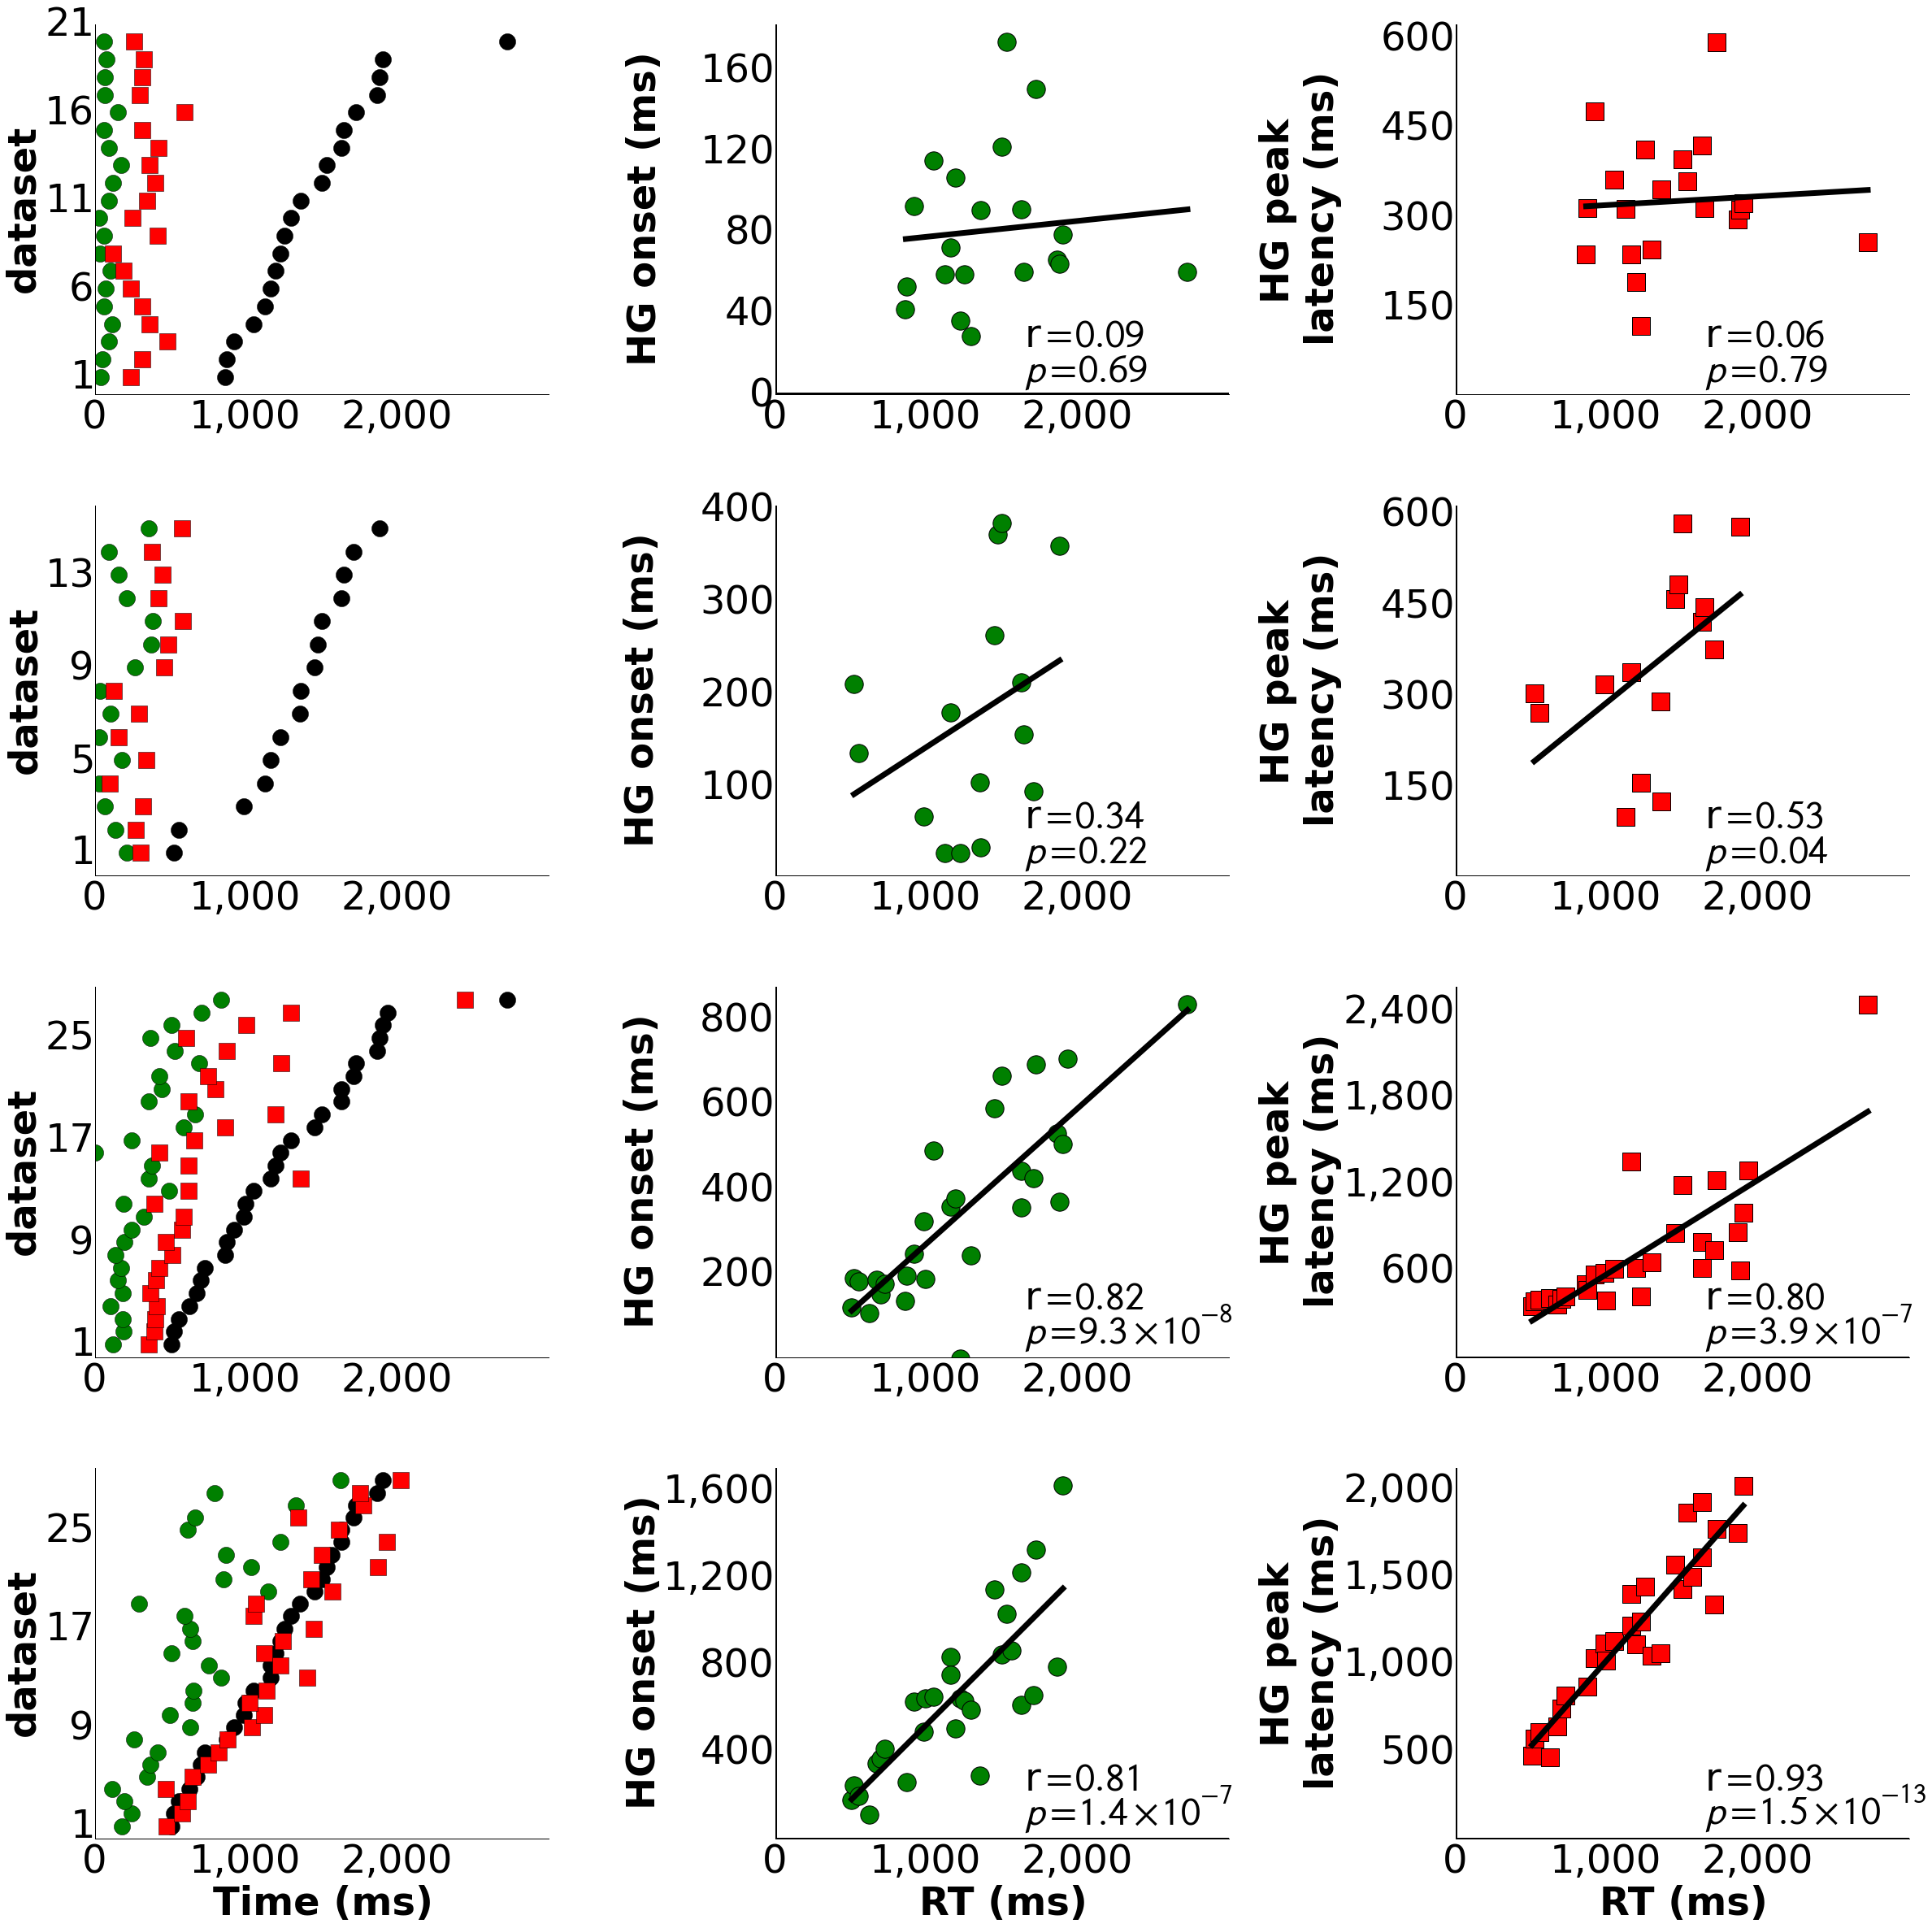

In [102]:
#'single trial' plot for all datasets for STI

filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 600
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 600

idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 500
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 500

#drop SR elecs that used to be R
#df_bad = pd.read_csv(os.path.join(SJdir,'PCA', 'csvs_FINAL', 'SR_elecs_to_drop.csv'))
#for row in df_bad.itertuples():
#    _, subj, task, elec = row
#    idx = df[(df.subj == subj) & (df.task== task) & (df.elec == elec)].index
#    df = df.drop(idx)
    

df['lats_semi_static_adjusted'] = df.lats_semi_static + df.start_idx #for D and R
df['lats_adjusted'] = df.lats + df.start_idx #for S and SR

elec_types = ['SR','S','D','R']

f, ax = plt.subplots(4,3, figsize = (40,40))

for i, pattern in enumerate(elec_types):
    

    df_sorted = df[df.pattern == pattern].groupby(['subj','task'])[['RTs_median','start_idx','lats_semi_static_adjusted', 'lats_adjusted']].mean().sort('RTs_median') 
    num_datasets = df_sorted.shape[0]
    
    if pattern in ['D','R']: #use different window params for D and R than S and SR
        lats = df_sorted['lats_semi_static_adjusted'] 
    else:
        lats = df_sorted['lats_adjusted']

    #single trials
    ax[i,0].plot(df_sorted.RTs_median, np.arange(num_datasets), marker = 'o', color = 'k', lw = 0, markersize = 20, label = 'RT')
    ax[i,0].plot(df_sorted.start_idx, np.arange(num_datasets), marker = 'o',color = 'g', lw = 0, markersize = 20, label = 'HG onset')
    ax[i,0].plot(lats, np.arange(num_datasets), marker = 's',color = 'r', lw = 0, markersize = 20, label = 'semi-static latency\n(HGonset : max(RT) + 500')
    ax[i,0].set_ylabel('dataset', weight = 'bold', fontsize = 48)
    ax[i,0].set_xlim([0,3000])
    ax[i,0].xaxis.set_tick_params(labelsize = 48)
    ax[i,0].yaxis.set_tick_params(labelsize = 48)
    ax[i,0].tick_params( axis='both', which = 'both', top = 'off', bottom = 'off', right = 'off', left = 'off')
    ax[i,0].spines['top'].set_visible(False)
    ax[i,0].spines['right'].set_visible(False)
    ax[i,0].set_xticks(np.arange(0, 3000, 1000))    
    ax[i,0].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks)
    ax[i,0].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    ax[i,0].set_ylim([-1, num_datasets]) #change yaxis indexing
    ylab = ax[i,0].get_yticks()
    ax[i,0].set_yticklabels((ylab+1).astype(int))

    ax[3,0].set_xlabel('Time (ms)', weight = 'bold', fontsize = 48)
    
    
    #scatterplots - HGonsets
    onsets = df_sorted['start_idx']
    rts = df_sorted.RTs_median
    
    ax[i,1].scatter(rts, onsets, marker = 'o', s = 500, facecolor = 'g')
    R, p = stats.pearsonr(onsets, rts)
    
    if i < 3: #pad axes so aligned
        ax[i,1].set_ylabel('HG onset (ms)', weight = 'bold', fontsize = 48, labelpad = 50)
    else:
        ax[i,1].set_ylabel('HG onset (ms)', weight = 'bold', fontsize = 48)

    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(onsets))[0]
    ax[i,1].plot(rts,rts*m+c, color = 'k', linewidth = 7) 

    if p > 0.0001:
        ax[i,1].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,1].text(0.55, 0.01, r"$p = {%.2f}$" %(p), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
    else:
        #ax[i,2].text(0.55, 0.01, r"r$ = {%.2f}$" '\n' r"$p = $%s" %(R, sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,1].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,1].text(0.55, 0.01, r"$p = $%s" %(sci_notation(p)), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)

    ax[0,1].set_ylim(ymin = 0) #hardcoded because of zero onset
    
    #scatterplots - latencies
    ax[i,2].scatter(rts, lats, marker = 's', s = 500, facecolor = 'r')
    R, p = stats.pearsonr(lats, rts)
    if i < 2:
        ax[i,2].set_ylabel('HG peak\nlatency (ms)',weight = 'bold', fontsize = 48, labelpad = 50)
    else:
        ax[i,2].set_ylabel('HG peak\nlatency (ms)',weight = 'bold', fontsize = 48)
    
    
    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(lats))[0]
    ax[i,2].plot(rts,rts*m+c, color = 'k', linewidth = 7, label = 'r = %.2f\np = %.3f' %(R, p)) 
    
    if p > 0.0001:
        ax[i,2].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,2].text(0.55, 0.01, r"$p = {%.2f}$" %(p), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
    else:
        #ax[i,2].text(0.55, 0.01, r"r$ = {%.2f}$" '\n' r"$p = $%s" %(R, sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,2].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,2].text(0.55, 0.01, r"$p = $%s" %(sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)

 
    for a in range(1,3):
        ax[i,a].patch.set_facecolor('white')
        ax[i,a].autoscale(tight=True)
        ax[i,a].spines['top'].set_visible(False)
        ax[i,a].spines['right'].set_visible(False)
        #ax[i,a].get_xaxis().tick_bottom()
        #ax[i,a].get_yaxis().tick_left()
        ax[i,a].xaxis.set_tick_params(labelsize = 48)
        ax[i,a].yaxis.set_tick_params(labelsize = 48)
        ax[i,a].set_xlim([0, 3000])
        ax[i,a].tick_params( axis='both', which = 'both', top = 'off', bottom = 'off', right = 'off', left = 'off')
        ax[i,a].axhline(linewidth = 4, color = 'k')
        ax[i,a].axvline(linewidth = 4, color = 'k')
        ax[i,a].set_xticks(np.arange(0, 3000, 1000))
        ax[i,a].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks
        ax[3,a].set_xlabel('RT (ms)',weight = 'bold', fontsize = 48)
        ax[i,a].set_ylim(bottom=5)
        ax[i,a].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax[i,a].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


f.subplots_adjust(wspace = 0.5)
f.subplots_adjust(hspace = 0.3)

        
filename = os.path.join(savedir, 'singletrials_and_correlations_onsets_and_latencies_ALL_pvals_commas_plus1.png')
f.savefig(filename, bbox_inches='tight', dpi = 150)


print savedir


/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Figures


/srv/local/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:38: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


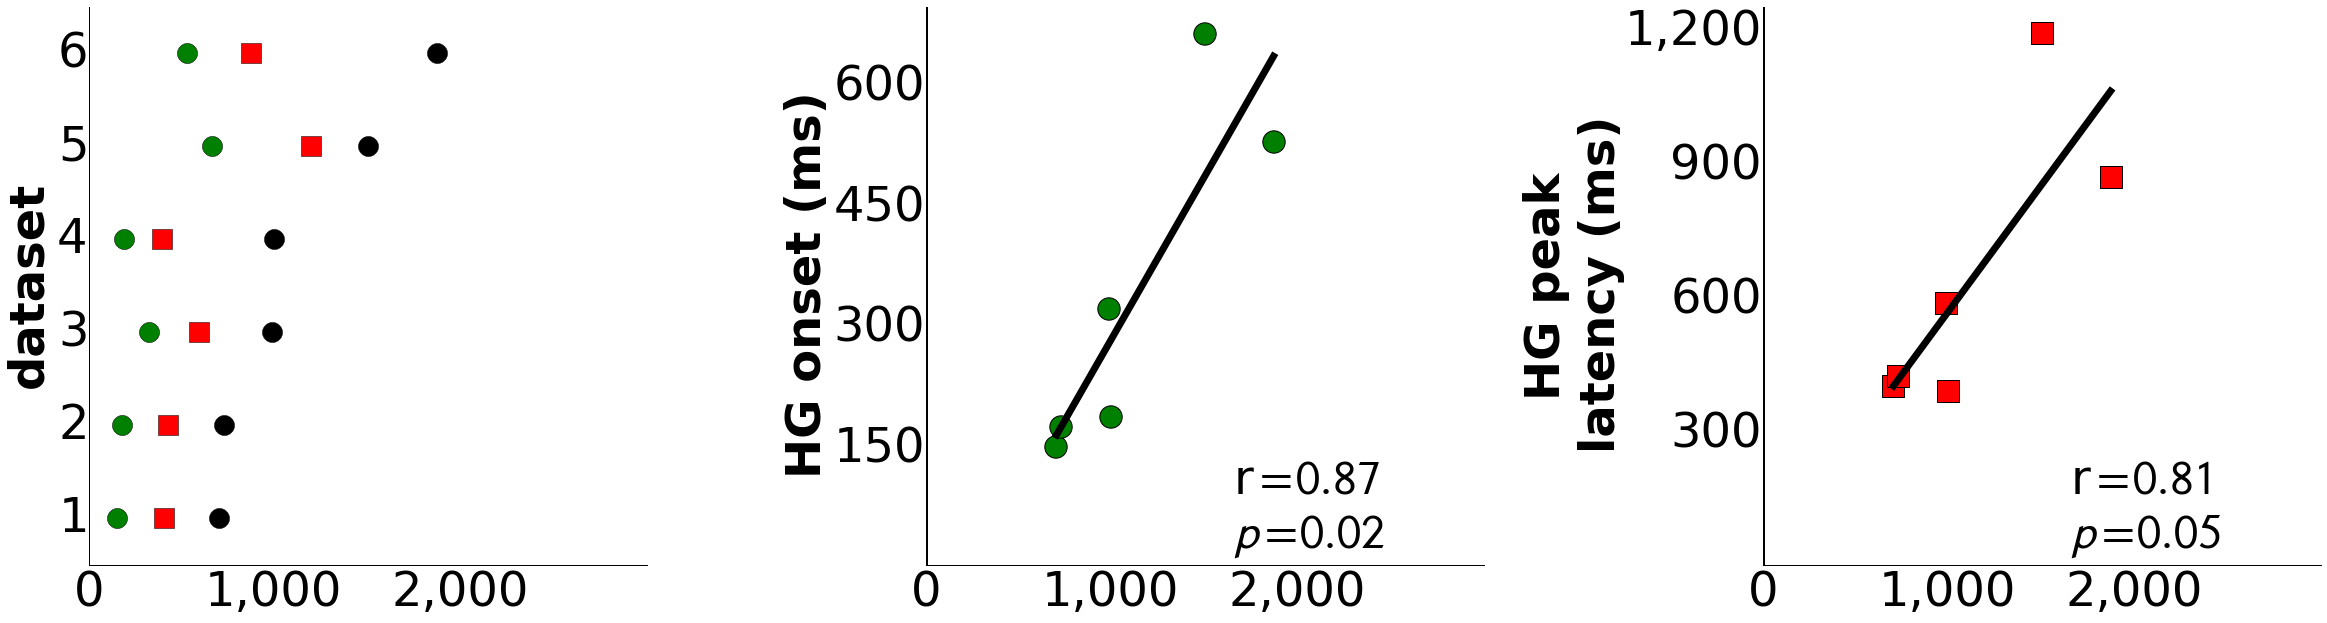

In [103]:
#'single trial' plot for GP15

filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 600
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 600

idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 500
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 500

#drop SR elecs that used to be R
#df_bad = pd.read_csv(os.path.join(SJdir,'PCA', 'csvs_FINAL', 'SR_elecs_to_drop.csv'))
#for row in df_bad.itertuples():
#    _, subj, task, elec = row
#    idx = df[(df.subj == subj) & (df.task== task) & (df.elec == elec)].index
#    df = df.drop(idx)
    

df['lats_semi_static_adjusted'] = df.lats_semi_static + df.start_idx #for D and R
df['lats_adjusted'] = df.lats + df.start_idx #for S and SR

elec_types = ['D']
df = df[df.subj == 'GP15']

f, ax = plt.subplots(1,3, figsize = (40,10))

for i, pattern in enumerate(elec_types):
    

    df_sorted = df[df.pattern == pattern].groupby(['subj','task'])[['RTs_median','start_idx','lats_semi_static_adjusted', 'lats_adjusted']].mean().sort('RTs_median') 
    num_datasets = df_sorted.shape[0]
    
    if pattern in ['D','R']: #use different window params for D and R than S and SR
        lats = df_sorted['lats_semi_static_adjusted'] 
    else:
        lats = df_sorted['lats_adjusted']

    #single trials
    ax[0].plot(df_sorted.RTs_median, np.arange(num_datasets), marker = 'o', color = 'k', lw = 0, markersize = 20, label = 'RT')
    ax[0].plot(df_sorted.start_idx, np.arange(num_datasets), marker = 'o',color = 'g', lw = 0, markersize = 20, label = 'HG onset')
    ax[0].plot(lats, np.arange(num_datasets), marker = 's',color = 'r', lw = 0, markersize = 20, label = 'semi-static latency\n(HGonset : max(RT) + 500')
    ax[0].set_ylabel('dataset', weight = 'bold', fontsize = 48)
    ax[0].set_xlim([0,3000])
    ax[0].xaxis.set_tick_params(labelsize = 48)
    ax[0].yaxis.set_tick_params(labelsize = 48)
    ax[0].tick_params( axis='both', which = 'both', top = 'off', bottom = 'off', right = 'off', left = 'off')
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].set_xticks(np.arange(0, 3000, 1000))    
    #ax[0].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks)
    ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    ax[0].set_ylim([-0.5, num_datasets-.5]) #change yaxis indexing
    ylab = ax[0].get_yticks()
    ax[0].set_yticklabels((ylab+1).astype(int))

    #ax[0].set_xlabel('Time (ms)', weight = 'bold', fontsize = 48)
    
    
    #scatterplots - HGonsets
    onsets = df_sorted['start_idx']
    rts = df_sorted.RTs_median
    
    ax[1].scatter(rts, onsets, marker = 'o', s = 500, facecolor = 'g')
    R, p = stats.pearsonr(onsets, rts)
    
    if i < 3: #pad axes so aligned
        ax[1].set_ylabel('HG onset (ms)', weight = 'bold', fontsize = 48)
    else:
        ax[1].set_ylabel('HG onset (ms)', weight = 'bold', fontsize = 48)

    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(onsets))[0]
    ax[1].plot(rts,rts*m+c, color = 'k', linewidth = 7) 

    if p > 0.0001:
        ax[1].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[1].text(0.55, 0.01, r"$p = {%.2f}$" %(p), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
    else:
        #ax[i,2].text(0.55, 0.01, r"r$ = {%.2f}$" '\n' r"$p = $%s" %(R, sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[1].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[1].text(0.55, 0.01, r"$p = $%s" %(sci_notation(p)), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)

    ax[1].set_ylim(ymin = 0) #hardcoded because of zero onset
    
    #scatterplots - latencies
    ax[2].scatter(rts, lats, marker = 's', s = 500, facecolor = 'r')
    R, p = stats.pearsonr(lats, rts)
    if i < 2:
        ax[2].set_ylabel('HG peak\nlatency (ms)',weight = 'bold', fontsize = 48)
    else:
        ax[2].set_ylabel('HG peak\nlatency (ms)',weight = 'bold', fontsize = 48)
    
    
    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(lats))[0]
    ax[2].plot(rts,rts*m+c, color = 'k', linewidth = 7, label = 'r = %.2f\np = %.3f' %(R, p)) 
    
    if p > 0.0001:
        ax[2].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[2].text(0.55, 0.01, r"$p = {%.2f}$" %(p), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
    else:
        #ax[i,2].text(0.55, 0.01, r"r$ = {%.2f}$" '\n' r"$p = $%s" %(R, sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[2].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[2].text(0.55, 0.01, r"$p = $%s" %(sci_notation(p)), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)

 
    for a in range(1,3):
        ax[a].patch.set_facecolor('white')
        ax[a].autoscale(tight=True)
        ax[a].spines['top'].set_visible(False)
        ax[a].spines['right'].set_visible(False)
        #ax[i,a].get_xaxis().tick_bottom()
        #ax[i,a].get_yaxis().tick_left()
        ax[a].xaxis.set_tick_params(labelsize = 48)
        ax[a].yaxis.set_tick_params(labelsize = 48)
        ax[a].set_xlim([0, 3000])
        ax[a].tick_params( axis='both', which = 'both', top = 'off', bottom = 'off', right = 'off', left = 'off')
        ax[a].axhline(linewidth = 4, color = 'k')
        ax[a].axvline(linewidth = 4, color = 'k')
        ax[a].set_xticks(np.arange(0, 3000, 1000))
        ax[a].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks
        #ax[a].set_xlabel('RT (ms)',weight = 'bold', fontsize = 48)
        ax[a].set_ylim(bottom=5)
        ax[a].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax[a].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


f.subplots_adjust(wspace = 0.5)
f.subplots_adjust(hspace = 0.3)

        
filename = os.path.join(savedir, 'singletrials_and_correlations_onsets_and_latencies_GP15_pvals_commas_plus1.png')
f.savefig(filename, bbox_inches='tight', dpi = 150)


print savedir


In [508]:
df[df.pattern == pattern].groupby(['task'])[['RTs_median','start_idx','lats_semi_static_adjusted', 'lats_adjusted']].mean().sort('RTs_median') 

,RTs_median,start_idx,lats_semi_static_adjusted,lats_adjusted
task,,,,
FaceGen,602.444444,300.555556,653.333333,653.333333
FaceEmo,611.800000,280.857143,631.314286,631.314286
DecisionVis,627.000000,113.666667,469.000000,469.000000
EmoRep,1135.075758,570.772727,1210.000000,1206.196970
SelfVis,1216.382353,645.617647,1187.558824,1187.558824
DecisionAud,1227.000000,644.857143,1245.857143,1245.857143
SelfAud,1477.515625,947.031250,1520.562500,1514.406250
EmoGen,1561.090909,761.000000,1395.409091,1395.409091


In [773]:
df_sorted

,RTs_median,start_idx,lats_semi_static_adjusted,lats_adjusted
task,,,,
FaceGen,612.500000,171.000000,399.083333,399.083333
FaceEmo,628.605263,171.763158,384.526316,384.526316
DecisionVis,760.000000,123.647059,468.382353,468.382353
EmoRep,932.062500,271.666667,541.875000,541.875000
DecisionAud,1227.000000,0.000000,425.500000,425.500000
SelfVis,1242.703125,344.562500,603.218750,591.125000
SelfAud,1597.139535,510.069767,897.906977,836.883721
EmoGen,1766.109091,455.963636,961.854545,898.472727


/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Figures


/srv/local/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


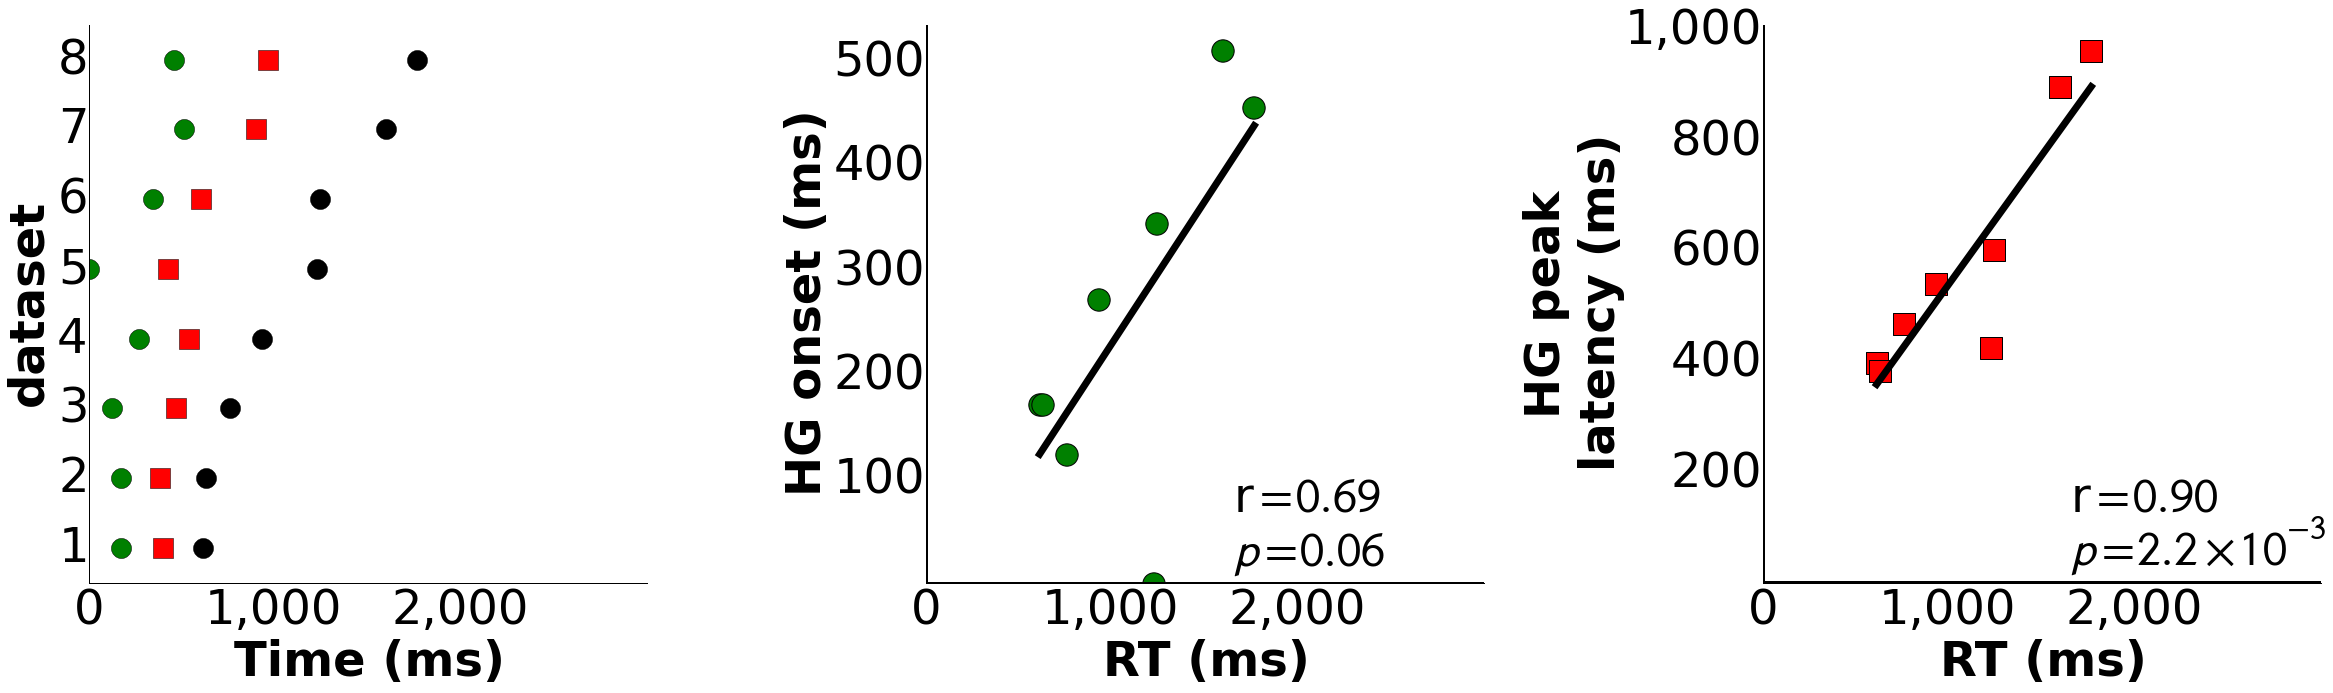

In [106]:
#'single trial' plot for all datsets for STI

filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 600
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 600

idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 500
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 500


df['lats_semi_static_adjusted'] = df.lats_semi_static + df.start_idx #for D and R
df['lats_adjusted'] = df.lats + df.start_idx #for S and SR

elec_types = ['D']

f, ax = plt.subplots(1,3, figsize = (40,10))

for i, pattern in enumerate(elec_types):
    
    df_sorted = df[df.pattern == pattern].groupby(['task'])[['RTs_median','start_idx','lats_semi_static_adjusted', 'lats_adjusted']].mean().sort('RTs_median') 
    num_datasets = df_sorted.shape[0]
    
    if pattern in ['D','R']: #use different window params for D and R than S and SR
        lats = df_sorted['lats_semi_static_adjusted'] 
    else:
        lats = df_sorted['lats_adjusted']

    #single trials
    ax[0].plot(df_sorted.RTs_median, np.arange(num_datasets), marker = 'o', color = 'k', lw = 0, markersize = 20, label = 'RT')
    ax[0].plot(df_sorted.start_idx, np.arange(num_datasets), marker = 'o',color = 'g', lw = 0, markersize = 20, label = 'HG onset')
    ax[0].plot(lats, np.arange(num_datasets), marker = 's',color = 'r', lw = 0, markersize = 20, label = 'semi-static latency\n(HGonset : max(RT) + 500')
    ax[0].set_ylabel('dataset', weight = 'bold', fontsize = 48)
    ax[0].set_xlim([0,3000])
    ax[0].xaxis.set_tick_params(labelsize = 48)
    ax[0].yaxis.set_tick_params(labelsize = 48)
    ax[0].tick_params( axis='both', which = 'both', top = 'off', bottom = 'off', right = 'off', left = 'off')
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].set_xticks(np.arange(0, 3000, 1000))    
    #ax[0].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks)
    ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    ax[0].set_ylim([-0.5, num_datasets-.5]) #change yaxis indexing
    ylab = ax[0].get_yticks()
    ax[0].set_yticklabels((ylab+1).astype(int))

    ax[0].set_xlabel('Time (ms)', weight = 'bold', fontsize = 48)
    
    
    #scatterplots - HGonsets
    onsets = df_sorted['start_idx']
    rts = df_sorted.RTs_median
    
    ax[1].scatter(rts, onsets, marker = 'o', s = 500, facecolor = 'g')
    R, p = stats.pearsonr(onsets, rts)
    
    if i < 3: #pad axes so aligned
        ax[1].set_ylabel('HG onset (ms)', weight = 'bold', fontsize = 48)
    else:
        ax[1].set_ylabel('HG onset (ms)', weight = 'bold', fontsize = 48)

    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(onsets))[0]
    ax[1].plot(rts,rts*m+c, color = 'k', linewidth = 7) 

    if p > 0.0001:
        ax[1].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[1].text(0.55, 0.01, r"$p = {%.2f}$" %(p), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
    else:
        #ax[i,2].text(0.55, 0.01, r"r$ = {%.2f}$" '\n' r"$p = $%s" %(R, sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[1].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[1].text(0.55, 0.01, r"$p = $%s" %(sci_notation(p)), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)

    ax[1].set_ylim(ymin = 0) #hardcoded because of zero onset
    
    #scatterplots - latencies
    ax[2].scatter(rts, lats, marker = 's', s = 500, facecolor = 'r')
    R, p = stats.pearsonr(lats, rts)
    if i < 2:
        ax[2].set_ylabel('HG peak\nlatency (ms)',weight = 'bold', fontsize = 48)
    else:
        ax[2].set_ylabel('HG peak\nlatency (ms)',weight = 'bold', fontsize = 48)
    
    
    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(lats))[0]
    ax[2].plot(rts,rts*m+c, color = 'k', linewidth = 7, label = 'r = %.2f\np = %.3f' %(R, p)) 
    
    if p > 0.01:
        ax[2].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[2].text(0.55, 0.01, r"$p = {%.2f}$" %(p), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
    else:
        #ax[i,2].text(0.55, 0.01, r"r$ = {%.2f}$" '\n' r"$p = $%s" %(R, sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[2].text(0.55, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[2].text(0.55, 0.01, r"$p = $%s" %(sci_notation(p)), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)

 
    for a in range(1,3):
        ax[a].patch.set_facecolor('white')
        ax[a].autoscale(tight=True)
        ax[a].spines['top'].set_visible(False)
        ax[a].spines['right'].set_visible(False)
        #ax[i,a].get_xaxis().tick_bottom()
        #ax[i,a].get_yaxis().tick_left()
        ax[a].xaxis.set_tick_params(labelsize = 48)
        ax[a].yaxis.set_tick_params(labelsize = 48)
        ax[a].set_xlim([0, 3000])
        ax[a].tick_params( axis='both', which = 'both', top = 'off', bottom = 'off', right = 'off', left = 'off')
        ax[a].axhline(linewidth = 4, color = 'k')
        ax[a].axvline(linewidth = 4, color = 'k')
        ax[a].set_xticks(np.arange(0, 3000, 1000))
        #ax[a].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks
        ax[a].set_xlabel('RT (ms)',weight = 'bold', fontsize = 48)
        ax[a].set_ylim(bottom=1)
        ax[a].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax[a].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


f.subplots_adjust(wspace = 0.5)
f.subplots_adjust(hspace = 0.3)

        
filename = os.path.join(savedir, 'singletrials_and_correlations_onsets_and_latencies_bytask_pvals_commas_plus1.png')
f.savefig(filename, bbox_inches='tight', dpi = 150)


print savedir


In [8]:
pattern = 'D'
df_sorted = df[df.pattern == pattern].groupby(['subj','task'])[['RTs_median','start_idx','lats_semi_static']].mean().sort('RTs_median') 
df_sorted['lats_semi_static_adjusted'] = df_sorted.lats_semi_static + df_sorted.start_idx
rts = df_sorted.RTs_median
   
lats_semistatic = df_sorted['lats_semi_static_adjusted'] 
    
R, p = stats.pearsonr(lats_semistatic, rts)

#drop ST1EmoGEn outlier
tmp = lats_semistatic.reset_index()
idx = tmp[(tmp.subj == 'ST1') & (tmp.task == 'EmoGen')].index.tolist()
tmp = tmp.drop(idx)
lats_semistatic = lats_semistatic.reset_index().drop(idx)
rts = rts.reset_index().drop(idx)

print 'dropped st1 emogen outlier %.4f %.4f' %(stats.pearsonr(lats_semistatic.lats_semi_static_adjusted, rts.RTs_median))
(stats.pearsonr(lats_semistatic.lats_semi_static_adjusted, rts.RTs_median))

dropped st1 emogen outlier 0.7110 0.0000


(0.71104041593666789, 3.2237469034170034e-05)

In [55]:
##difference in onsets and latencies for duration and response
pattern = 'D'
df_sorted = df[df.pattern == pattern].groupby(['subj','task'])[['RTs_median','start_idx','lats_semi_static']].mean().sort('RTs_median') 
df_sorted['lats_semi_static_adjusted'] = df_sorted.lats_semi_static + df_sorted.start_idx
D_onsets = df_sorted['start_idx']
D_lats_semistatic = df_sorted['lats_semi_static_adjusted'] 


pattern = 'R'
df_sorted = df[df.pattern == pattern].groupby(['subj','task'])[['RTs_median','start_idx','lats_semi_static']].mean().sort('RTs_median') 
df_sorted['lats_semi_static_adjusted'] = df_sorted.lats_semi_static + df_sorted.start_idx
R_onsets = df_sorted['start_idx']
R_lats_semistatic = df_sorted['lats_semi_static_adjusted'] 
   

In [71]:
print stats.ttest_ind(D_onsets, R_onsets)
print stats.ttest_ind(D_lats_semistatic, R_lats_semistatic)


(-3.7482505299927964, 0.00042914701290897034)
(-2.8866019099750821, 0.0055552449223340685)


## plot all of duration trials for each bin (stacked single trials)

In [302]:


#load data (without my data)
p = 'D'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '.mat')
data_dict = loadmat.loadmat(filename)
alldata, allRTs, allsubjs, alltasks, alloffsets = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks', 'alloffsets']]

bins = np.arange(allRTs.min(), allRTs.max(), 50)
first_bin = bins[0]
last_bin = bins[-1]
cnt = 0
start_i = 0
new_b = 0

for i, b in enumerate(bins):

    if i > 1:
        start_i = end_i+1
    end_i = np.where(allRTs <= (b+1))[-1][-1]
    
    previous_b = new_b #keep track of previous and current bin, for labeling
    new_b = b
    
    if len(np.arange(start_i, end_i))<100:
        continue
    
    data = alldata[start_i:end_i,:]
    rts = allRTs[start_i:end_i]
    
    #sort all trials and prepare RTs
    idx = np.argsort(rts)
    data = data[idx,:]
    rts = rts[idx]

    #cut_off = np.median(np.median(np.where(data == 0),axis = 0)) 
    #if cut_off < np.min(rts)-500:
    #    print 'cutoff too short %i' %(cut_off)
    #    cut_off = np.max(rts) + 500
    #    print 'using new cutoff %i' %(cut_off)
    #data = data[:,:cut_off]

    #plot
    f, ax = plt.subplots(1,1,figsize = (5,5))
    
    ax.autoscale(enable = True, tight = True)
    ax.patch.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.xaxis.set_tick_params(labelsize = 14)
    ax.yaxis.set_tick_params(labelsize = 14)

    cax = ax.pcolormesh(np.arange(-500, data.shape[1]-500), np.arange(0, len(rts)), data, zorder = 0)# , cmap = plt.get_cmap('bwr_r'))
    cbar = f.colorbar(cax, ticks = [-3.5, 0 , 3.5], orientation = 'vertical')
    cax.set_clim(vmin=-3.5,vmax=3.5)

    for j in np.arange(len(rts)):
        ax.plot((rts[j], rts[j]), (j-0.5, j+0.5), 'k', linewidth = 3,zorder = 1)

    ax.set_title('RT Bin : %i - %i ms' %(previous_b, new_b))
    ax.set_xlabel('Time (ms)', fontsize = 20)
    ax.set_ylabel('Trials', fontsize = 20)

    filename = os.path.join(savedir, 'binned_singletrials', 'binned_RTs_singletrials_%i-%i.png' %(previous_b, new_b))
    plt.savefig(filename)#, dpi = 300)
    plt.close('all')
print savedir


/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations


## values calculated from traces

In [289]:
np.where(np.in1d(np.round(data, decimals =6), np.intersect1d(np.round(data, decimals = 6), np.round(data_resp, decimals = 6))))

(array([  48,  332,  336,  342,  653,  685,  730,  761,  787,  862, 1071,
        1085, 1171, 1272, 1715, 1755, 1931, 1968, 2178, 2493, 2537, 2538,
        2678, 3136, 3534, 3580, 3830, 3841, 3960, 4137, 4631, 4644, 4651,
        4870, 5103, 5372, 5404, 5627, 5751, 5833, 5911, 5986, 5999, 6248,
        6332]),)

In [43]:
filename = os.path.join(savedir, 'binned_RTs_withresp.csv')
df_bins = pd.read_csv(filename)
print savedir

/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations


(array([  45.,   57.,   97.,   91.,  162.,  191.,  177.,  159.,  180.,
         197.,  220.,  287.,  228.,  194.,  219.,  235.,  260.,  210.,
         236.,  218.,  225.,  236.,  231.,  197.,  128.,  136.,  148.,
         125.,  120.,  107.,   90.,  138.,   68.,   97.,   81.,  115.,
          64.,   66.,   57.,   83.,   48.,   47.,   53.,   26.,   62.,
          43.,   35.,   30.,   24.,   27.,   40.,   34.,   20.,   24.,
          12.,   21.,   22.,   21.,   20.,   14.,   15.,    6.,   12.,
          19.,   17.,    0.,    8.,    4.,    8.,   13.,   12.,   10.,
           4.,    6.,   13.,    8.,   12.,    7.,    3.,    4.,   21.,
           9.,    3.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    3.,    0.,    0.,    3.,    0.,    3.,    1.,    3.]),
 array([  300.  ,   334.98,   369.96,   404.94,   439.92,   474.9 ,
          509.88,   544.86,   579.84,   614.82,   649.8 ,   684.78,
          719.76,   754.74,   789.72,   824.7 ,   859.68,   894.66,
      

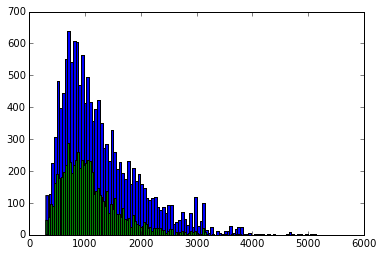

In [44]:
bins = np.arange(allRTs.min(), allRTs.max(), 50)
bins_resp = np.arange(allRTs_resp.min(), allRTs_resp.max(), 50)

plt.hist(allRTs, bins = 100)
plt.hist(allRTs_resp, bins = 100)

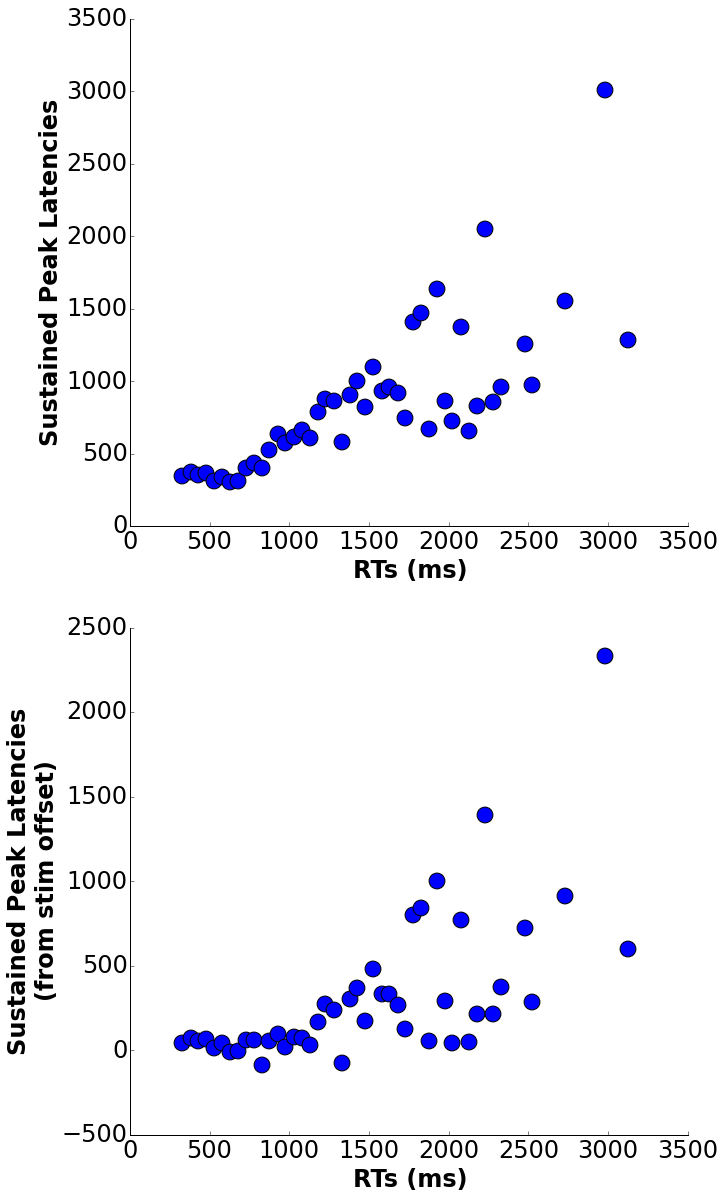

In [209]:
f, ax = plt.subplots(2,1, figsize = (10,20))

ax[0].scatter(df_bins['rts'], df_bins['lats'],marker = 'o', s=250)
ax[0].set_ylabel('Sustained Peak Latencies',weight = 'bold', fontsize = 24)
ax[1].scatter(df_bins['rts'], df_bins['lats_fromoffset'],marker = 'o', s=250)
ax[1].set_ylabel('Sustained Peak Latencies\n(from stim offset)',weight = 'bold', fontsize = 24)

for i in range(2):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 24)
    ax[i].yaxis.set_tick_params(labelsize = 24)
    ax[i].set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)


filename = os.path.join(savedir, 'binned_RTs_correlation_fromoffset.png')
plt.savefig(filename)

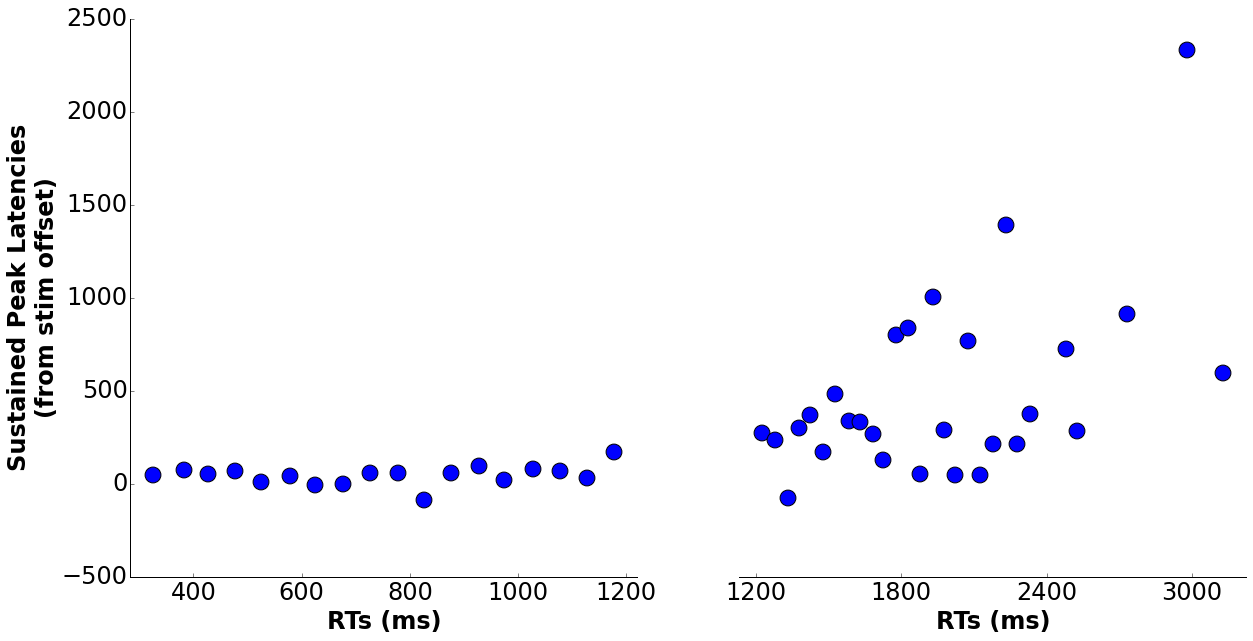

In [504]:
f, ax = plt.subplots(1,2, figsize = (20,10))

df_bins1 = df_bins[(df_bins.rts<1200)]
df_bins2 = df_bins[(df_bins.rts>1200)]

ax[0].scatter(df_bins1['rts'], df_bins1['lats_fromoffset'],marker = 'o', s=250)
ax[0].yaxis.set_tick_params(labelsize = 24)
ax[0].set_xlim([200, 1200])
ax[0].set_ylabel('Sustained Peak Latencies\n(from stim offset)',weight = 'bold', fontsize = 24)

ax[1].scatter(df_bins2['rts'], df_bins2['lats_fromoffset'],marker = 'o', s=250)
ax[1].set_xlim([1100, 3500])
ax[1].spines['left'].set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_xticks(np.arange(1200, 3500, 600))

for i in range(2):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=True)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 24)
    ax[i].set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
    ax[i].set_ylim([-500, 2500])


filename = os.path.join(savedir, 'binned_RTs_correlation_fromoffset_split.png')
plt.savefig(filename)

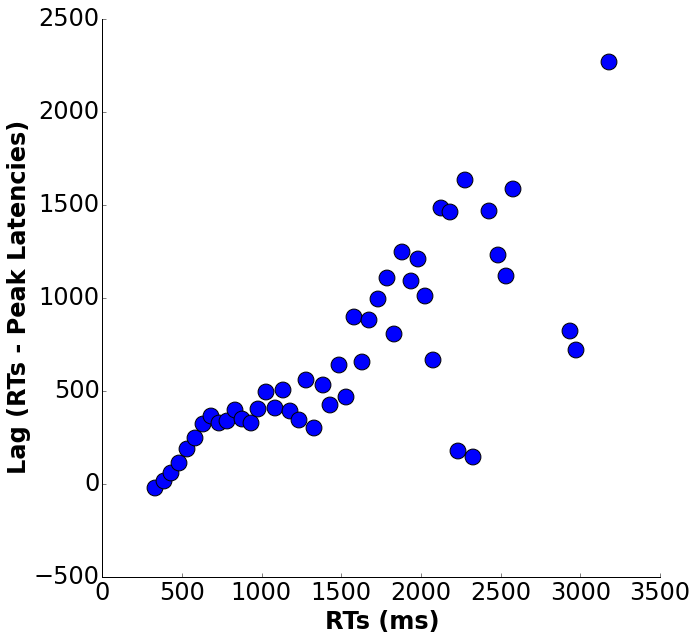

In [255]:
f, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_bins['rts'], df_bins['rts']-df_bins['lats'],marker = 'o', s=250)

ax.patch.set_facecolor('white')
ax.autoscale(tight=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.xaxis.set_tick_params(labelsize = 24)
ax.yaxis.set_tick_params(labelsize = 24)
ax.set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
ax.set_ylabel('Lag (RTs - Peak Latencies)',weight = 'bold', fontsize = 24)

filename = os.path.join(savedir, 'binned_RTs_correlation_lag.png')
plt.savefig(filename)

## onsets for different types of elecs 


In [10]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
df.loc[idx,'end_idx'] = df.loc[idx].start_idx - 600 #only relevant for S/SR
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 600
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 600

idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500
df.loc[idx,'end_idx'] = df.loc[idx].start_idx - 500 # only relevant for S/SR
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 500
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 500

df['lats_semi_static'] = df.lats_semi_static + df.start_idx #for D and R
df['lats'] = df.lats + df.start_idx #for S and SR

df = df[df.pattern.isin(['D','R','S','SR'])]

df_sorted = df.groupby(['subj','task', 'pattern'])[['RTs_median','start_idx','end_idx','lats_semi_static', 'lats']].mean() 

dfmean = df_sorted.reset_index().groupby('pattern').mean()
dfsem = df_sorted.reset_index().groupby('pattern').sem()

pd.DataFrame([dfmean['end_idx'], dfsem['end_idx']])

pattern,D,R,S,SR
end_idx,-84.813158,1843.809485,715.404825,663.360816
end_idx,371.026657,150.248311,152.393419,119.335184


In [21]:
print df_sorted.reset_index().groupby(['pattern']).count()

         subj  task  RTs_median  start_idx  end_idx  lats_semi_static  lats
pattern                                                                    
D          28    28          28         28        4                28    28
R          29    29          29         29       29                29    29
S          15    15          15         15       15                15    15
SR         20    20          20         20       20                20    20


In [7]:
dfstd = df_sorted.reset_index().groupby('pattern').std()


onsets

	u = 80.000, p = 0.010
	u = 107.000, p = 0.005
	u = 194.000, p = 0.0004
latencies

	u = 130.000, p = 0.26
	u = 61.000, p = 0.0001
	u = 158.000, p = 0.00004


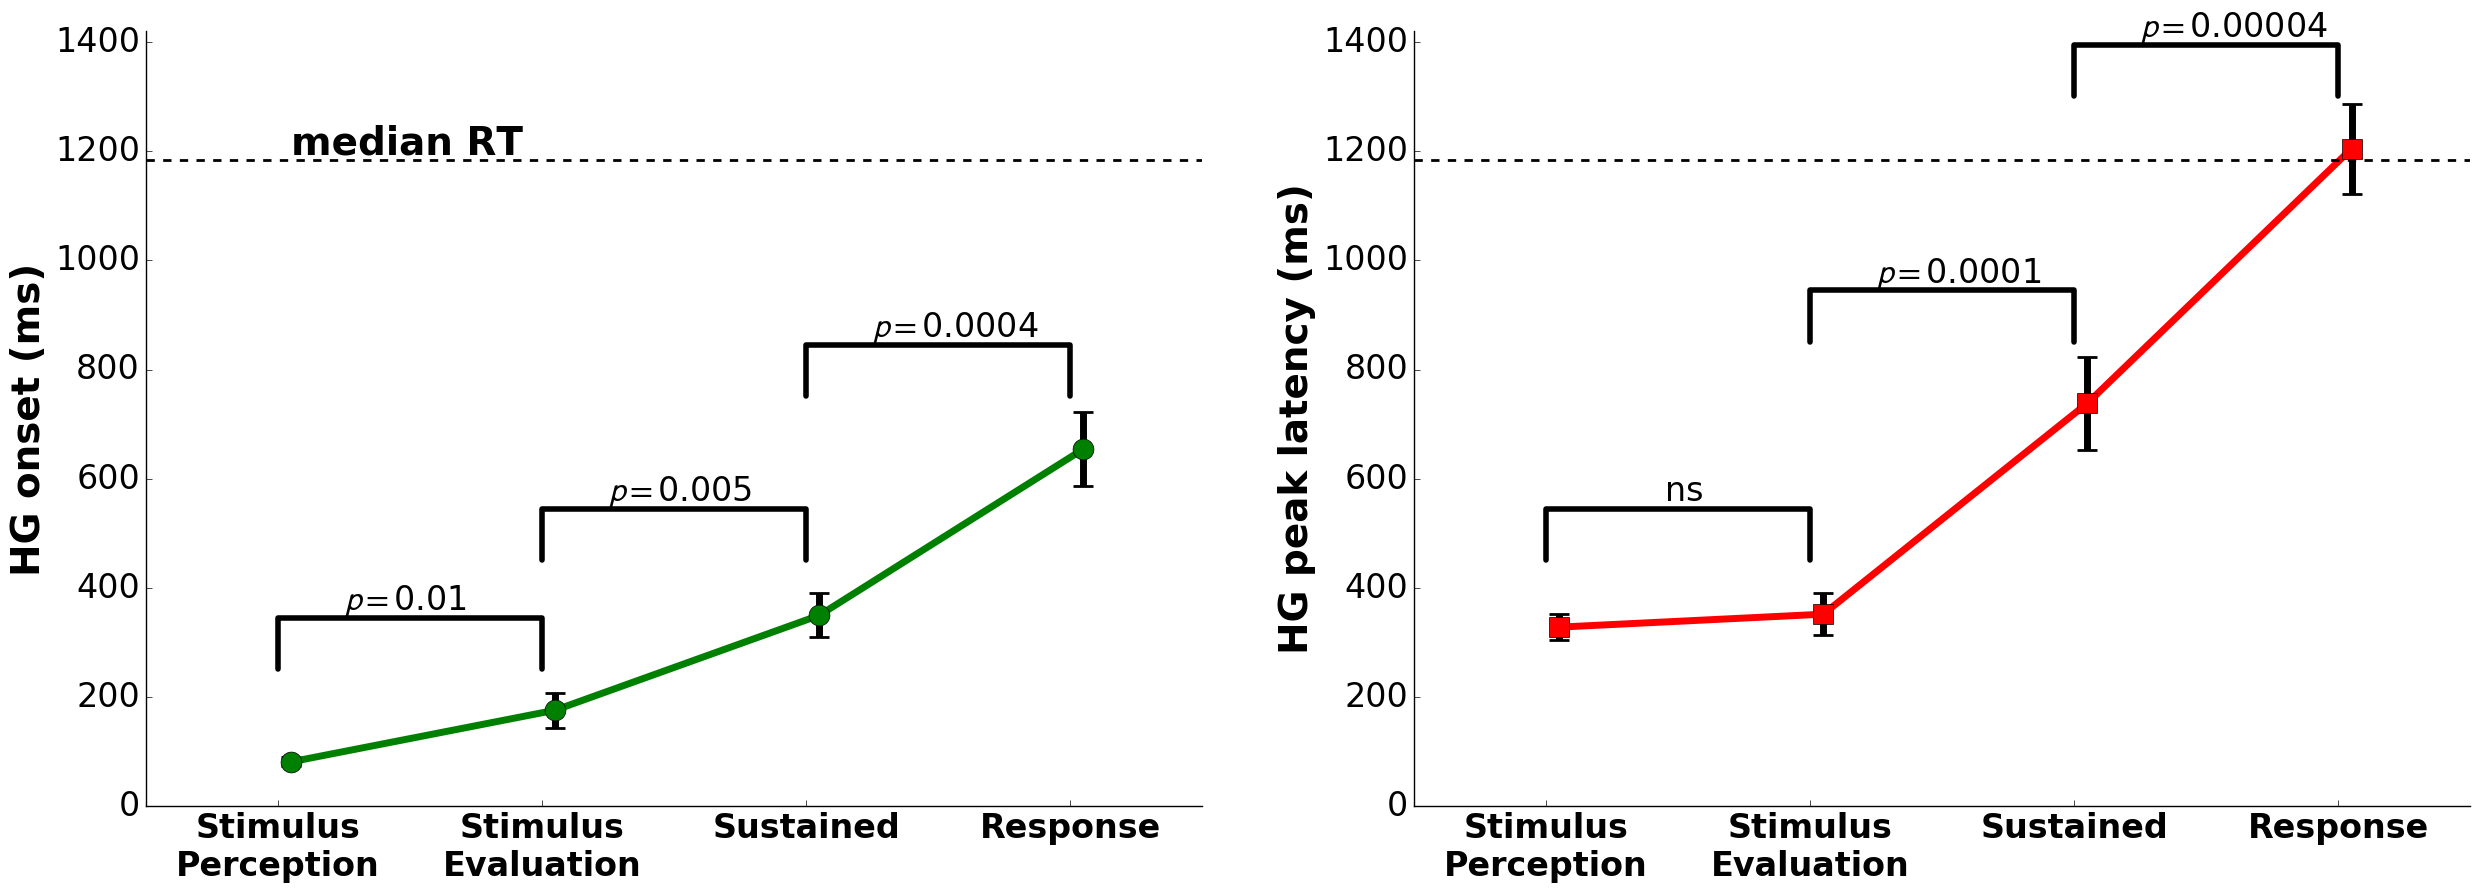

In [12]:
#plot
f,ax = plt.subplots(1, 2, figsize = (30,10))

ind = np.arange(4)
width = 0.35  


for i in range(2):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].set_xlim([-.5, 3.5])
    ax[i].yaxis.set_tick_params(labelsize = 24)
    xTickMarks = ['Stimulus\nPerception','Stimulus\nEvaluation', 'Sustained', 'Response']
    ax[i].set_xticks([0,1,2,3])
    xtickNames = ax[i].set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')
    ax[i].set_ylim([0, 1420])
    
x = (0.05, 1.05, 2.05, 3.05)

yerr = (dfsem.loc['SR'].start_idx, dfsem.loc['S'].start_idx, dfsem.loc['D'].start_idx, dfsem.loc['R'].start_idx)
y = (dfmean.loc['SR'].start_idx, dfmean.loc['S'].start_idx, dfmean.loc['D'].start_idx, dfmean.loc['R'].start_idx)

ax[0].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[0].plot(x, y, lw = 5, marker='o', color = 'green',  markersize =15, label = 'HG onsets')
ax[0].set_ylabel('HG onset (ms)',weight = 'bold', fontsize = 28)

yerr = (dfsem.loc['SR'].lats, dfsem.loc['S'].lats, dfsem.loc['D'].lats_semi_static, dfsem.loc['R'].lats_semi_static)
y = (dfmean.loc['SR'].lats, dfmean.loc['S'].lats, dfmean.loc['D'].lats_semi_static, dfmean.loc['R'].lats_semi_static)

ax[1].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[1].plot(x, y, lw = 5, marker='s', color = 'red', markersize =15, label = 'HG peak latencies')
ax[1].set_ylabel('HG peak latency (ms)',weight = 'bold', fontsize = 28)

# y = [dfmean.loc['SR'].RTs_median, dfmean.loc['S'].RTs_median, dfmean.loc['D'].RTs_median, dfmean.loc['R'].RTs_median]
# ax[1].plot(x, y, lw = 0, marker = '^', color = 'k', markersize = 15, label = 'RT')

y = dfmean.loc['R'].RTs_median
for i in range(2):
    ax[i].axhline(y = y, lw = 2, color = 'k', ls = '--')
ax[0].annotate('median RT', xy = (x[0], y+10), fontsize = 28, weight = 'bold')


#significance bars
props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'lw':4}

print ('onsets\n')
data = [onsets_sorted[onsets_sorted.pattern == p].start_idx for p in ['SR','S','D','R']] #onsets sorted from cell below (anova)
u, p =  stats.mannwhitneyu(data[0],data[1])
print('\tu = %.3f, p = %.3f' %(u, p))
#ax[0].annotate('p=%.2f' %(p), xy=(.25,360), zorder=10, fontsize = 24)#, weight = 'bold')
ax[0].annotate(r"$p = $%.2f" %(p), xy=(.25,360), zorder = 10, fontsize = 24)

ax[0].annotate('', xy=(0, 200), xytext=(1,200), arrowprops=props)

u, p =  stats.mannwhitneyu(data[1],data[2])
print('\tu = %.3f, p = %.3f' %(u, p))
#ax[0].annotate('p=%.3f'%(p), xy=(1.25,560), zorder=10, fontsize = 24)#, weight = 'bold')
ax[0].annotate(r"$p = $%.3f" %(p), xy=(1.25,560), zorder = 10, fontsize = 24)
ax[0].annotate('', xy=(1, 400), xytext=(2,400), arrowprops=props)


u, p =  stats.mannwhitneyu(data[2],data[3])
print('\tu = %.3f, p = %.4f' %(u, p))
#ax[0].annotate('p=%.4f'%(p), xy=(2.25,860), zorder=10, fontsize = 24)#, weight = 'bold')
ax[0].annotate(r"$p = $%.4f" %(p), xy=(2.25,860), zorder = 10, fontsize = 24)
ax[0].annotate('', xy=(2, 700), xytext=(3,700), arrowprops=props)

print('latencies\n')
data = [lats_sorted[lats_sorted.pattern == p].lats for p in ['SR','S','D','R']] #onsets sorted from cell below (anova)
u, p =  stats.mannwhitneyu(data[0],data[1])
print('\tu = %.3f, p = %.2f' %(u, p))
ax[1].annotate('ns', xy=(.45,560), zorder=10, fontsize = 24)
ax[1].annotate('', xy=(0, 400), xytext=(1,400), arrowprops=props)

u, p =  stats.mannwhitneyu(data[1],data[2])
print('\tu = %.3f, p = %.4f' %(u, p))
#ax[1].annotate('p=%.4f'%(p), xy=(1.25,960), zorder=10, fontsize = 24)#, weight = 'bold')
ax[1].annotate(r"$p = $%.4f" %(p), xy=(1.25,960), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(1, 800), xytext=(2,800), arrowprops=props)

u, p =  stats.mannwhitneyu(data[2],data[3])
print('\tu = %.3f, p = %.5f' %(u, p))
#ax[1].annotate('p=%.5f'%(p), xy=(2.25,1400), zorder=10, fontsize = 24)
ax[1].annotate(r"$p = $%.5f" %(p), xy=(2.25,1410), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(2, 1250), xytext=(3,1250), arrowprops=props)


filename = os.path.join(savedir, 'HGonsets_bytype_pvals.png',)
plt.savefig(filename, dpi = 150)



In [13]:
filename

'/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Figures/HGonsets_bytype_pvals.png'

In [95]:
# lats_sorted[['pattern','lats']].to_csv('/home/knight/matar/lats_sorted.csv')
# onsets_sorted[['pattern','start_idx']].to_csv('/home/knight/matar/onsets_sorted.csv')

NameError: name 'lats_sorted' is not defined

In [99]:
print ('onsets n:\n\tSR = {0}\n\tS = {1}\n\tD = {2}\n\tR = {3}'.format(sum(onsets_sorted.pattern == 'SR'), sum(onsets_sorted.pattern == 'S'), sum(onsets_sorted.pattern == 'D'), sum(onsets_sorted.pattern == "R")))
print ('latencies n:\n\tSR = {0}\n\tS = {1}\n\tD = {2}\n\tR = {3}'.format(sum(lats_sorted.pattern == 'SR'), sum(lats_sorted.pattern == 'S'), sum(lats_sorted.pattern == 'D'), sum(lats_sorted.pattern == "R")))


onsets n:
	SR = 20
	S = 15
	D = 28
	R = 29
latencies n:
	SR = 20
	S = 15
	D = 28
	R = 29


In [264]:
df.groupby(['subj','task']).RTs_median.mean().to_csv('/home/knight/matar/MATLAB/DATA/Avgusta/PCA/RTs/RT_summary_dropSR.csv')

In [267]:
## resp locked onsets for R and offsets for D and R
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

df = df[df.pattern.isin(['D','R'])]

df_sorted = df.groupby(['subj','task', 'pattern'])[['start_idx_resp','end_idx_resp']].mean() 

dfmean = df_sorted.reset_index().groupby('pattern').mean()
dfsem = df_sorted.reset_index().groupby('pattern').sem()

dfsem

,end_idx_resp,start_idx_resp,subj,task
pattern,,,,
D,25.679898,NaN,NaN,NaN
R,9.525395,15.902414,NaN,NaN


In [268]:
dfstd = df_sorted.reset_index().groupby('pattern').std()
dfstd

,start_idx_resp,end_idx_resp
pattern,,
D,NaN,135.885246
R,85.63712,51.295820


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# R code on R sample dataset

#> anova(with(ChickWeight, lm(weight ~ Time + Diet)))
#Analysis of Variance Table
#
#Response: weight
#           Df  Sum Sq Mean Sq  F value    Pr(>F)
#Time        1 2042344 2042344 1576.460 < 2.2e-16 ***
#Diet        3  129876   43292   33.417 < 2.2e-16 ***
#Residuals 573  742336    1296
#write.csv(file='ChickWeight.csv', x=ChickWeight, row.names=F)

# cw = pd.read_csv('ChickWeight.csv')

# cw_lm=ols('weight ~ Time + C(Diet)', data=cw).fit() #Specify C for Categorical
# print(sm.stats.anova_lm(cw_lm, typ=2))

In [9]:
#ANOVA
## resp locked onsets for R and offsets for D and R
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
df.loc[idx,'end_idx'] = df.loc[idx].start_idx - 600 #only relevant for S/SR
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 600
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 600

idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500
df.loc[idx,'end_idx'] = df.loc[idx].start_idx - 500 # only relevant for S/SR
df.loc[idx,'RTs_median'] = df.loc[idx].RTs_median - 500
df.loc[idx,'lats_static'] = df.loc[idx].lats_static - 500

df['lats_semi_static'] = df.lats_semi_static + df.start_idx #for D and R
df['lats'] = df.lats + df.start_idx #for S and SR

df = df[df.pattern.isin(['D','R','S','SR'])]
 

#onsets
onsets = df[['subj','task','pattern','start_idx']]
onsets_sorted = onsets.groupby(['subj','task', 'pattern']).mean().reset_index() #group by subj/task
onsets_lm = ols('start_idx ~ C(pattern)', data = onsets_sorted).fit()
print('ONSETS')
print(sm.stats.anova_lm(onsets_lm, typ = 1))


#latencies
SR = df[df.pattern == 'SR'][['subj','task','lats']]
S = df[df.pattern == 'S'][['subj','task','lats']]
D = df[df.pattern == 'D'][['subj','task','lats_semi_static']]
R = df[df.pattern == 'R'][['subj','task','lats_semi_static']]

A = df[df.pattern.isin(['SR', 'S'])][['subj','task','pattern','lats']]
B = df[df.pattern.isin(['D', 'R'])][['subj','task','pattern','lats_semi_static']]
B.columns = ['subj','task','pattern','lats']
lats = pd.merge(A, B, how = 'outer')
lats_sorted = lats.groupby(['subj','task', 'pattern']).mean().reset_index() #group by subj/task


lats_lm = ols('lats ~ C(pattern)', data = lats_sorted).fit()
print('LATENCIES')
print(sm.stats.anova_lm(lats_lm, typ = 1))

ONSETS
              df        sum_sq       mean_sq          F        PR(>F)
C(pattern)   3.0  4.579982e+06  1.526661e+06  25.860932  4.356855e-12
Residual    88.0  5.194946e+06  5.903347e+04        NaN           NaN
LATENCIES
              df        sum_sq       mean_sq          F        PR(>F)
C(pattern)   3.0  1.191549e+07  3.971830e+06  30.314239  1.490389e-13
Residual    88.0  1.152993e+07  1.310219e+05        NaN           NaN


In [271]:
data = [onsets_sorted[onsets_sorted.pattern == p].start_idx for p in ['SR','S','D','R']]

print stats.kruskal(data[0],data[1], data[2], data[3])


data = [lats_sorted[lats_sorted.pattern == p].lats for p in ['SR','S','D','R']]

print stats.kruskal(np.log(data[0]),np.log(data[1]), np.log(data[2]), np.log(data[3]))


KruskalResult(statistic=53.071192132905118, pvalue=1.7703947521272373e-11)
KruskalResult(statistic=58.930883406223131, pvalue=9.9454245499443245e-13)


LeveneResult(statistic=1.1133730200503806, pvalue=0.34809227971954421)

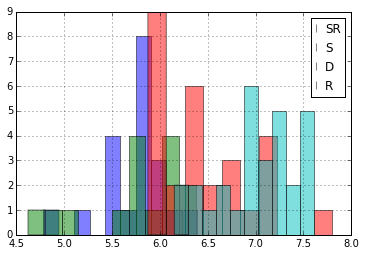

In [272]:
labels = ['SR','S','D','R']
for i, x in enumerate(data):
    np.log(x).hist(alpha = 0.5, label = labels[i])
    plt.legend()    
stats.levene(np.log(data[0]),np.log(data[1]), np.log(data[2]), np.log(data[3])) #log transform has equal variances, can use KW test

In [282]:
#pairwise non parametric
'''
print stats.ttest_ind(df[df.pattern == 'SR'].start_idx, df[df.pattern == 'S'].start_idx)
print stats.ttest_ind(df[df.pattern == 'S'].start_idx, df[df.pattern == 'D'].start_idx)
print stats.ttest_ind(df[df.pattern == 'D'].start_idx, df[df.pattern == 'R'].start_idx)


print stats.ttest_ind(df[df.pattern == 'SR'].lats, df[df.pattern == 'S'].lats)
print stats.ttest_ind(df[df.pattern == 'S'].lats, df[df.pattern == 'D'].lats)
print stats.ttest_ind(df[df.pattern == 'D'].lats, df[df.pattern == 'R'].lats)
'''

data = [onsets_sorted[onsets_sorted.pattern == p].start_idx for p in ['SR','S','D','R']]
u, p =  stats.mannwhitneyu(data[0],data[1])
print 'onsets:'
print '\tSR vs S : {0}'.format(p*2)
u, p =  stats.mannwhitneyu(data[1],data[2])
print '\tS vs D : {0}'.format(p*2)
u, p =  stats.mannwhitneyu(data[2],data[3])
print '\tD vs R : {0}'.format(p*2)


data = [lats_sorted[lats_sorted.pattern == p].lats for p in ['SR','S','D','R']]
u, p =  stats.mannwhitneyu(data[0],data[1])
print 'latencies:'
print '\tSR vs S : {0}'.format(p*2)
u, p =  stats.mannwhitneyu(data[1],data[2])
print '\tS vs D : {0}'.format(p*2)
u, p =  stats.mannwhitneyu(data[2],data[3])
print '\tD vs R : {0}'.format(p*2)


onsets:
	SR vs S : 0.0205130532457
	S vs D : 0.00900035990762
	D vs R : 0.000735343188895
latencies:
	SR vs S : 0.515692221612
	S vs D : 0.000154246942496
	D vs R : 7.79236534044e-05


## proportions in PFC etc

In [231]:
from collections import Counter

In [47]:
np.unique(df.ROI)

array(['ATL', 'Area_37', 'Broca', 'FrPole', 'IFG', 'IPL', 'ITG', 'InfTemp',
       'MFG', 'MFG_premot', 'MTG', 'MedOccip', 'MedParietal', 'OFC',
       'Occip', 'Occip_par', 'PCC', 'Post_centrl', 'PreSMA', 'Pre_centrl',
       'R', 'R_ATL', 'R_IFG', 'R_IPL', 'R_InfTemp', 'R_MFG',
       'R_MFG_premot', 'R_MTG', 'R_MedParietal', 'R_Post_centrl',
       'R_PreSMA', 'R_Pre_centrl', 'R_SMA', 'R_SPL', 'R_STG', 'R_dACC',
       'SFG', 'SMA', 'SPL', 'STG', 'dACC', 'preSMA'], dtype=object)

In [50]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

frontal = ['Broca','FrPole','IFG','MFG','MFG_premot','OFC','PreSMA','Pre_centrl','SFG','SMA','dACC','preSMA', 'R_IFG','R_MFG','R_MFG_premot', 'R_PreSMA','R_Pre_centrl','R_SMA','R_dACC']
leftfrontal = ['Broca','FrPole','IFG','MFG','MFG_premot','OFC','PreSMA','Pre_centrl','SFG','SMA','dACC','preSMA']
PFC = ['Broca','FrPole','IFG','MFG','MFG_premot','OFC','PreSMA','SFG','SMA','dACC','preSMA', 'R_IFG','R_MFG','R_MFG_premot', 'R_PreSMA','R_SMA','R_dACC']


df_frontal = df[(df.ROI.isin(frontal))]
df_left_frontal = df[(df.ROI.isin(leftfrontal))]
dfPFC = df[df.ROI.isin(PFC)]

print sum(df_frontal.pattern == 'D')/sum(df.pattern == 'D') ## 75% of all STI sites are in PFC
print sum((dfPFC.pattern == 'D')/sum(df.pattern == 'D'))
#print sum(df_left_frontal.pattern == 'D')/sum(df.pattern == 'D') #% of LPFC in all STI sites

print sum(df_frontal.pattern == 'D')/df_frontal.shape[0]
#print sum(df_left_frontal.pattern == 'D')/df_left_frontal.shape[0]
print sum(dfPFC.pattern == 'D')/dfPFC.shape[0]

print sum(df_frontal.pattern == 'S')/df_frontal.shape[0]
print sum(dfPFC.pattern == 'S')/dfPFC.shape[0]

print sum(df_frontal.pattern == 'R')/df_frontal.shape[0]
print sum(dfPFC.pattern == 'R')/dfPFC.shape[0]


print sum(df_left_frontal.pattern == 'D')/sum(df.pattern == 'D')

dfACC = df[(df.ROI.isin(['dACC', 'R_dACC']))]
print sum(dfACC.pattern == 'D')/sum(df.pattern == 'D')

dfpreSMA = df[(df.ROI.isin(['preSMA', 'PreSMA', 'R_PreSMA']))]
print sum(dfpreSMA.pattern == 'D')/sum(df.pattern == 'D')

dfassoc = df[df.ROI.isin(['ATL','Area_37','IPL','ITG','InfTemp','MedOccip','MedParietal','Occip_par','PCC','R_ATL','R_IPL','R_InfTemp','R_MedParietal','R_SPL','SPL'])]
print sum(dfassoc.pattern == 'D')/sum(df.pattern == 'D')

0.758333333333
0.616666666667
0.548192771084
0.621848739496
0.0963855421687
0.121848739496
0.28313253012
0.18487394958
0.7375
0.0458333333333
0.00833333333333
0.170833333333


In [173]:
#do stats on onset times
stats.ttest_ind(df[df.pattern == 'D'].lats_semi_static, df[df.pattern == 'R'].lats_semi_static)

(-10.760618396322677, 3.1532464998606242e-24)

## ROI table

In [122]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

In [39]:
dfroi = df.groupby(['pattern','ROI']).count().elec
dfroi = pd.DataFrame(dfroi)
dfroi.columns = ['Number of Sites']
dfroi.to_csv(os.path.join(SJdir, 'PCA','csvs_FINAL','roi_counts.csv'), index = True)

In [42]:
np.unique(df.ROI)

array(['ATL', 'Area_37', 'Broca', 'FrPole', 'IFG', 'IPL', 'ITG', 'InfTemp',
       'MFG', 'MFG_premot', 'MTG', 'MedOccip', 'MedParietal', 'OFC',
       'Occip', 'Occip_par', 'PCC', 'Post_centrl', 'PreSMA', 'Pre_centrl',
       'R', 'R_ATL', 'R_IFG', 'R_IPL', 'R_InfTemp', 'R_MFG',
       'R_MFG_premot', 'R_MTG', 'R_MedParietal', 'R_Post_centrl',
       'R_PreSMA', 'R_Pre_centrl', 'R_SMA', 'R_SPL', 'R_STG', 'R_dACC',
       'SFG', 'SMA', 'SPL', 'STG', 'dACC', 'preSMA'], dtype=object)

In [163]:
from __future__ import print_function
for i in sort(brain_ROI['GP35_words'].keys()):
    print('%s' %(i), end = ', ')

ATL, Broca, IPL, MFG, MTG, Post_centrl, Pre_centrl, STG, 

# calculate percentages of STI vs coverage
* Linguistic tasks having more Broca coverage and non-linguistic more MFG coverage. 
* % of STI electrodes relative to coverage for 
    * a) language tasks (all but Faces and Vis Categorization) 
        * Broca
        * MFG
    * b) non-language tasks (Faces and Vis Categorization)
        * Broca
        * MFG

In [109]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

filename = os.path.join(SJdir, 'ROIs', 'brain_ROI.mat')
data = loadmat.loadmat(filename)
brain_ROI = data['brain_ROI']

In [120]:
pd.DataFrame(brain_ROI).transpose().to_csv('/home/knight/matar/MATLAB/DATA/Avgusta/ROIs/per_subject.csv')

In [562]:
subjs = list(unique(df.subj))
subjs.remove('GP35')
subjs.extend(['GP35_face','GP35_words'])


def get_coverage(brain_ROI, ROI, subj_list):
    total = 0
    for s in subj_list:
        try:
            total+= len(brain_ROI[s][ROI])
        except:
            continue
    return total

get_coverage(brain_ROI, 'MFG', subjs)

82

In [489]:
non_language_tasks = ['FaceEmo', 'FaceGen', 'DecisionVis']
language_tasks = [x for x in list(unique(df.task)) if x not in non_language_tasks]


In [573]:

df_lang = df[(df.task.isin(language_tasks))]
df_non_lang = df[(df.task.isin(non_language_tasks))]

lang_subjs = list(unique(df_lang.subj))
lang_subjs.remove('GP35')
lang_subjs.extend(['GP35_words'])

nonlang_subjs = list(unique(df_non_lang.subj))
nonlang_subjs.remove('GP35')
nonlang_subjs.extend(['GP35_face'])


print 'COVERAGE\nLANGUAGE TASKS\n\tMFG: %i\n\tBroca: %i' %(get_coverage(brain_ROI, 'MFG', lang_subjs), get_coverage(brain_ROI, 'Broca', lang_subjs))

print 'NONLANGUAGE TASKS\n\tMFG: %i\n\tBroca: %i' %(get_coverage(brain_ROI, 'MFG', nonlang_subjs), get_coverage(brain_ROI, 'Broca', nonlang_subjs))

COVERAGE
LANGUAGE TASKS
	MFG: 57
	Broca: 75
NONLANGUAGE TASKS
	MFG: 37
	Broca: 54


In [570]:
x = sum((df_lang.pattern == 'D') & (df_lang.ROI == 'Broca'))/get_coverage(brain_ROI, 'Broca', lang_subjs)
print 'STI in Broca for language tasks relative to all Broca coverage in language tasks : %.2f' %(x*100)

x = sum((df_lang.pattern == 'D') & (df_lang.ROI == 'MFG'))/get_coverage(brain_ROI, 'MFG', lang_subjs)
print 'STI in MFG for language tasks relative to all MFG coverage in language tasks : %.2f' %(x*100)

x = sum((df_non_lang.pattern == 'D') & (df_non_lang.ROI == 'Broca'))/get_coverage(brain_ROI, 'Broca', nonlang_subjs)
print 'STI in Broca for nonlanguage tasks relative to all Broca coverage in nonlanguage tasks : %.2f' %(x*100)

x = sum((df_non_lang.pattern == 'D') & (df_non_lang.ROI == 'MFG'))/get_coverage(brain_ROI, 'MFG', nonlang_subjs)
print 'STI in MFG for nonlanguage tasks relative to all MFG coverage in nonlanguage tasks : %.2f' %(x*100)


STI in Broca for language tasks relative to all Broca coverage in language tasks : 74.67
STI in MFG for language tasks relative to all MFG coverage in language tasks : 33.33
STI in Broca for nonlanguage tasks relative to all Broca coverage in nonlanguage tasks : 16.67
STI in MFG for nonlanguage tasks relative to all MFG coverage in nonlanguage tasks : 48.65


In [ ]:
print sum(df_frontal.pattern == 'D')/sum(df.pattern == 'D') ## 75% of all STI sites are in PFC
print sum((dfPFC.pattern == 'D')/sum(df.pattern == 'D'))
#print sum(df_left_frontal.pattern == 'D')/sum(df.pattern == 'D') #% of LPFC in all STI sites

print sum(df_frontal.pattern == 'D')/df_frontal.shape[0]
#print sum(df_left_frontal.pattern == 'D')/df_left_frontal.shape[0]
print sum(dfPFC.pattern == 'D')/dfPFC.shape[0]

print sum(df_frontal.pattern == 'S')/df_frontal.shape[0]
print sum(dfPFC.pattern == 'S')/dfPFC.shape[0]

print sum(df_frontal.pattern == 'R')/df_frontal.shape[0]
print sum(dfPFC.pattern == 'R')/dfPFC.shape[0]

## mean number of elecs recorded per subj

In [585]:
total = 0
for i, s in enumerate(brain_ROI.keys()):
    total+=sum([len(x) for x in brain_ROI[s].keys()])
total/i

72.099999999999994

# plot rts, peaks and offsets by bins

In [40]:
df.shape

(43, 20)

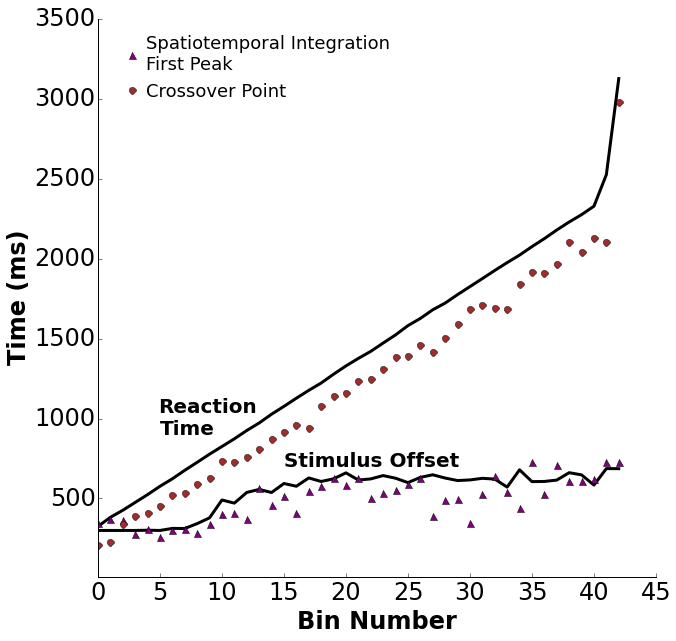

In [616]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_D+R.csv')
df = pd.read_csv(filename)

filename = os.path.join(savedir, 'binned_RTs_withresp.csv')
df_values = pd.read_csv(filename)

#extract values
rts = df['RT']
offsets = df_values['offsets']
t2 = df['t2 (last cross)']
firstpeak = df['1st dur peak (t4)']

#plot
f, ax = plt.subplots(figsize = (10,10))

line, = ax.plot(rts.index, rts, lw = 3, color = 'k')
t = ax.annotate('Reaction\nTime', xy = (5,900), color= 'k', fontsize = 20, fontweight = 'bold')
#text_slope_match_line(t, 5, 5, line)
#update_text_slopes()

ax.plot(rts.index, offsets, lw = 3, color = 'k')
#ax.annotate('Stimulus\nOffset', xy = (10,150), color= 'k', fontsize = 20, fontweight = 'bold')
ax.annotate('Stimulus Offset', xy = (15,700), color= 'k', fontsize = 20, fontweight = 'bold')

ax.plot(rts.index, firstpeak, '^', markersize = 7, color = 'purple', label = 'Spatiotemporal Integration\nFirst Peak')
ax.plot(rts.index, t2, 'o', markersize = 7, color = 'brown', label = 'Crossover Point')


#ax.annotate('Crossover\nPoint', xy = (29,1300), color= 'k', fontsize = 20, fontweight = 'bold')
#ax.annotate('First HG peak\n(Domain General)', xy = (15,120), color= 'k', fontsize = 20, fontweight = 'bold')

ax.patch.set_facecolor('white')
ax.autoscale(tight=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.xaxis.set_tick_params(labelsize = 24)
ax.yaxis.set_tick_params(labelsize = 24)
ax.set_xlabel('Bin Number',weight = 'bold', fontsize = 24)
ax.set_ylabel('Time (ms)',weight = 'bold', fontsize = 24)
ax.set_ylim(bottom = 10)


handles, labels = ax.get_legend_handles_labels()
lgnd = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(.55,1), frameon = False, fontsize = 18)
  

filename = os.path.join(savedir, 'binned_RTs_bounded_t2_t4.png')
f.savefig(filename,bbox_inches='tight', dpi = 150)


In [626]:
rotated_labels = []
def text_slope_match_line(text, x, y, line):
    global rotated_labels

    # find the slope
    xdata, ydata = line.get_data()

    x1 = xdata[0]
    x2 = xdata[-1]
    y1 = ydata[0]
    y2 = ydata[-1]

    rotated_labels.append({"text":text, "line":line, "p1":numpy.array((x1, y1)), "p2":numpy.array((x2, y2))})

def update_text_slopes():
    global rotated_labels

    for label in rotated_labels:
        # slope_degrees is in data coordinates, the text() and annotate() functions need it in screen coordinates
        text, line = label["text"], label["line"]
        p1, p2 = label["p1"], label["p2"]

        # get the line's data transform
        ax = line.get_axes()

        sp1 = ax.transData.transform_point(p1)
        sp2 = ax.transData.transform_point(p2)

        rise = (sp2[1] - sp1[1])
        run = (sp2[0] - sp1[0])

        slope_degrees = math.degrees(math.atan(rise/run))

        text.set_rotation(slope_degrees)

# Regression Figures

In [160]:
range(3)

[0, 1, 2]

In [355]:
df.shape 
rts.shape

(30,)

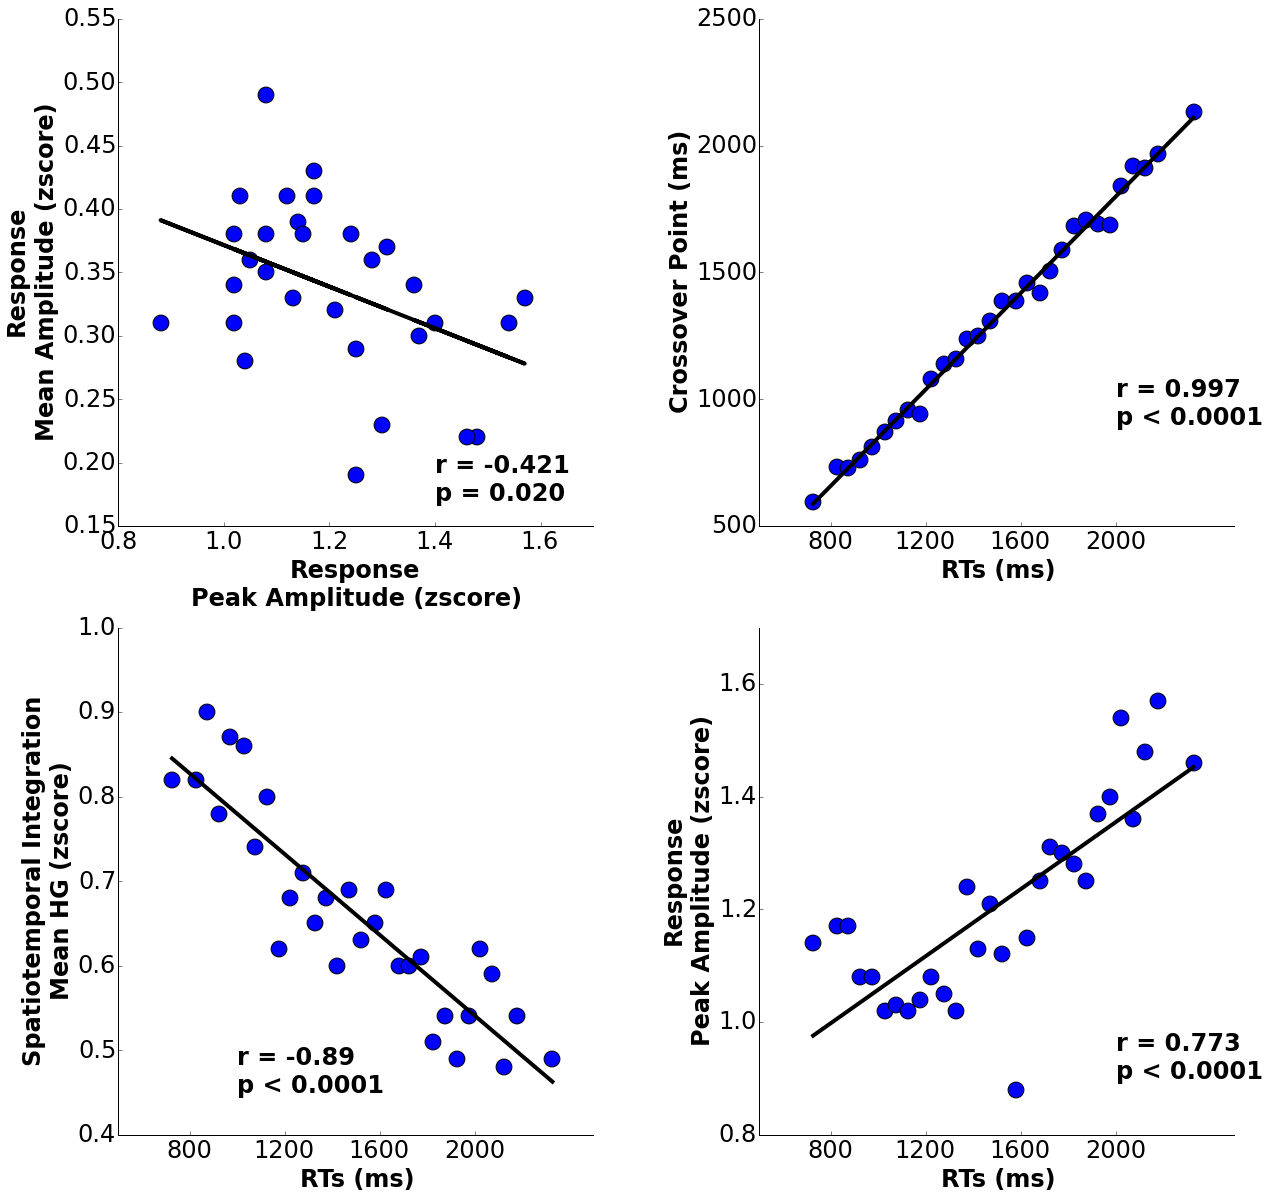

In [390]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_RegressionValues.csv')
df = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_RegressionLat.csv')
dfLat = pd.read_csv(filename)

#extract values
rts = df['RT']
means_d = df['mean Dur (t4:t2)']
amp_r = df['Resp peak']
t2 = dfLat['t2 (last cross)']
mean_r = df['mean Resp (t4:t2)']


#plot
f, ax = plt.subplots(2,2, figsize = (20,20))
ax = ax.flatten()

ax[2].scatter(rts[~(np.isnan(means_d))], means_d.dropna(), marker = 'o', s=250)
ax[2].set_ylabel('Spatiotemporal Integration\nMean HG (zscore)',weight = 'bold', fontsize = 24)
#ax[2].set_ylabel('Mean HG (zscore)',weight = 'bold', fontsize = 24)
R, p = stats.pearsonr(means_d.dropna(), rts[~(np.isnan(means_d))])
A = np.vstack([rts[~(np.isnan(means_d))],np.ones(len(rts[~(np.isnan(means_d))]))]).T
m,c = np.linalg.lstsq(A,np.array(means_d.dropna()))[0]
ax[2].plot(rts[~(np.isnan(means_d))],rts[~(np.isnan(means_d))]*m+c, color = 'k', linewidth = 4)
ax[2].annotate('r = %.2f\np < 0.0001' %(R), xy = (1000,0.45), color= 'k', fontsize = 24, fontweight = 'bold')

ax[3].scatter(rts, amp_r, marker = 'o', s=250)
ax[3].set_ylabel('Response\nPeak Amplitude (zscore)',weight = 'bold', fontsize = 24)
#ax[3].set_ylabel('Peak Amplitude (zscore)',weight = 'bold', fontsize = 24)
R, p = stats.pearsonr(amp_r, rts)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(amp_r))[0]
ax[3].plot(rts,rts*m+c, color = 'k', linewidth = 4)
ax[3].annotate('r = %.3f\np < 0.0001' %(R), xy = (2000,0.9), color= 'k', fontsize = 24, fontweight = 'bold')


ax[1].scatter(rts, t2, marker = 'o', s=250)
ax[1].set_ylabel('Crossover Point (ms)',weight = 'bold', fontsize = 24)
R, p = stats.pearsonr(t2, rts)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(t2))[0]
ax[1].plot(rts,rts*m+c, color = 'k', linewidth = 4)
ax[1].annotate('r = %.3f\np < 0.0001' %(R), xy = (2000,900), color= 'k', fontsize = 24, fontweight = 'bold')


ax[0].scatter(amp_r, mean_r, marker = 'o', s=250)
ax[0].set_ylabel('Response\nMean Amplitude (zscore)',weight = 'bold', fontsize = 24)
ax[0].set_xlabel('Response\nPeak Amplitude (zscore)',weight = 'bold', fontsize = 24)

R, p = stats.pearsonr(amp_r, mean_r)
A = np.vstack([amp_r,np.ones(len(amp_r))]).T
m,c = np.linalg.lstsq(A,np.array(mean_r))[0]
ax[0].plot(amp_r,amp_r*m+c, color = 'k', linewidth = 4)
ax[0].annotate('r = %.3f\np = %.3f' %(R,p), xy = (1.4,0.17), color= 'k', fontsize = 24, fontweight = 'bold')



for i in np.arange(0,4):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 24)
    ax[i].yaxis.set_tick_params(labelsize = 24)

for i in np.arange(1,4):    
    ax[i].set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
    ax[i].set_xticks(np.arange(800, 2400, 400))


f.subplots_adjust(wspace = 0.35)
    
filename = os.path.join(savedir, 'regression_values_correlations.png')
plt.savefig(filename)

# combined regression and t4/t2 figure

(30,)
(30,)


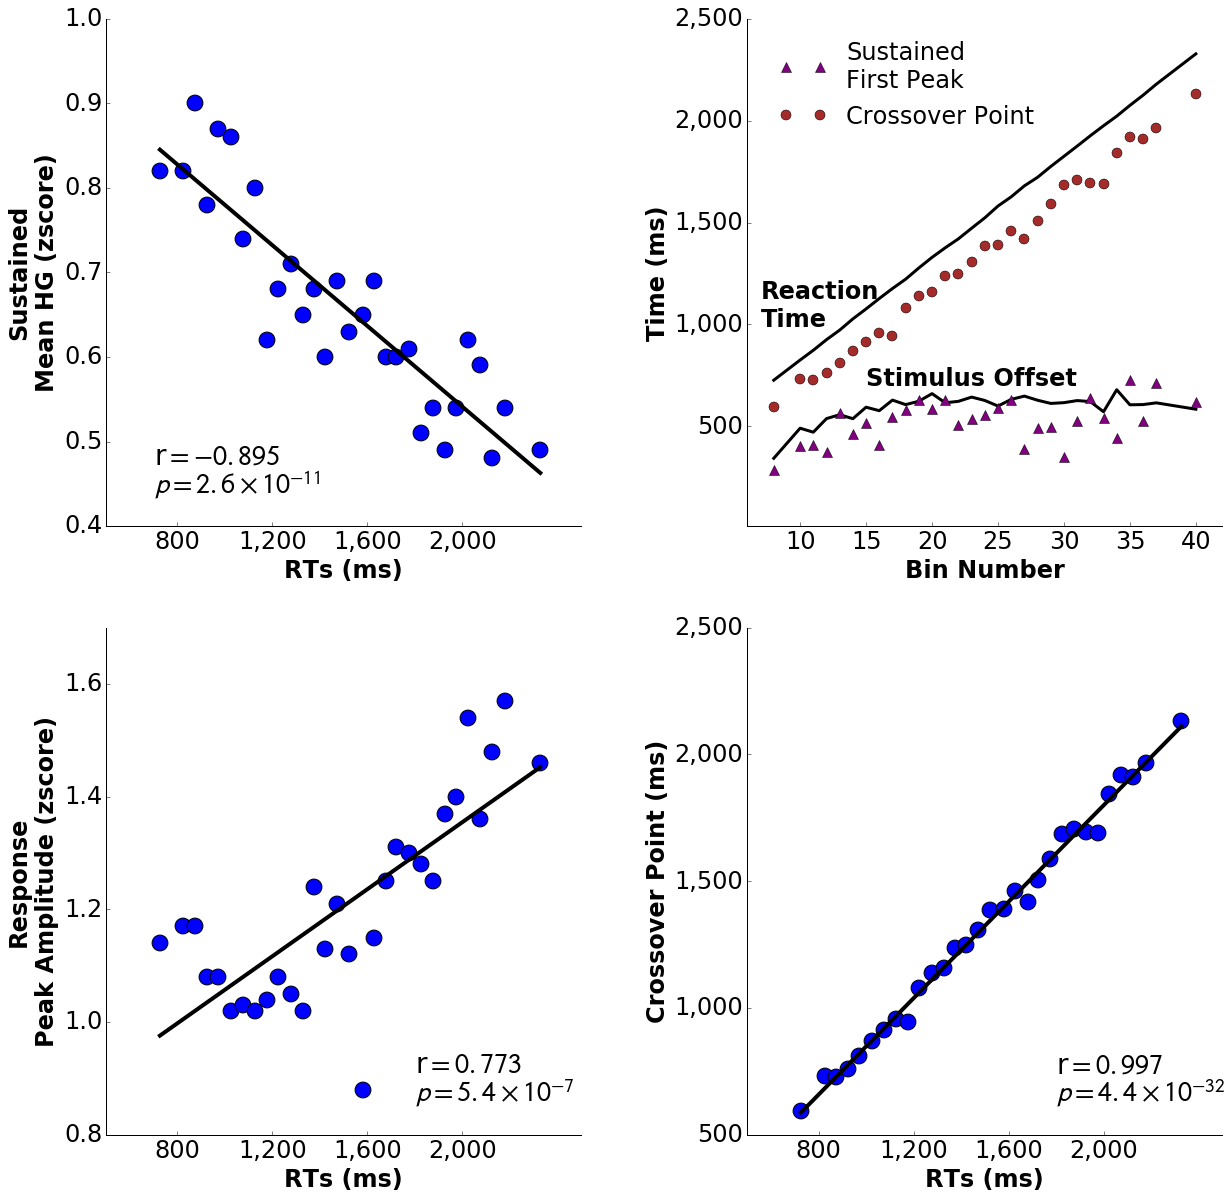

In [18]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_D+R.csv')
df = pd.read_csv(filename)

filename = os.path.join(savedir, 'binned_RTs_withresp.csv')
df_values = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_RegressionValues.csv')
dfAmp = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_RegressionLat.csv')
dfLat = pd.read_csv(filename)

#match bins to regression
df = df.iloc[np.in1d(df.RT.values, dfAmp.RT.values)]
df_values['rts'] = df_values.rts.apply(floor)
df_values = df_values.iloc[np.in1d(df_values.rts.values, dfAmp.RT.values)]


#plot
f, ax = plt.subplots(2,2, figsize = (20,20))
ax = ax.flatten()


#extract values (axis 0)
# rts = df['RT']
# offsets = df_values['offsets']
# t2 = df['t2 (last cross)']
# firstpeak = df['1st dur peak (t4)']

# line, = ax[1].plot(rts.index, rts, lw = 3, color = 'k', label = '_nolegend_')
# t = ax[1].annotate('Reaction\nTime', xy = (7,990), color= 'k', fontsize = 24, fontweight = 'bold')
# ax[1].plot(rts.index, offsets, lw = 3, color = 'k', label = '_nolegend_')
# ax[1].annotate('Stimulus Offset', xy = (15,700), color= 'k', fontsize = 24, fontweight = 'bold')
# ax[1].plot(rts.index, firstpeak, '^', markersize = 10, color = 'purple', label = 'Sustained\nFirst Peak')
# ax[1].plot(rts.index, t2, 'o', markersize = 10, color = 'brown', label = 'Crossover Point')

# ax[1].set_xlabel('Bin Number',weight = 'bold', fontsize = 24)
# ax[1].set_ylabel('Time (ms)',weight = 'bold', fontsize = 24)
# ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# handles, labels = ax[1].get_legend_handles_labels()
# lgnd = ax[1].legend(handles, labels, bbox_to_anchor=(.65,1), frameon = False, fontsize = 24)

#extract values (regression)
rts = dfAmp['RT']
means_d = dfAmp['mean Dur (t4:t2)']
amp_r = dfAmp['Resp peak']
t2 = dfLat['t2 (last cross)']
mean_r = dfAmp['mean Resp (t4:t2)']
print t2.shape
print amp_r.shape

# ax[3].scatter(rts, t2, marker = 'o', s=250)
# ax[3].set_ylabel('Crossover Point (ms)',weight = 'bold', fontsize = 24)
# R, p = stats.pearsonr(t2, rts)
# A = np.vstack([rts,np.ones(len(rts))]).T
# m,c = np.linalg.lstsq(A,np.array(t2))[0]
# ax[3].plot(rts,rts*m+c, color = 'k', linewidth = 4)
# #ax[2].annotate('r = %.3f\np = %s' %(R, sci_notation(p)), xy = (2000,900), color= 'k', fontsize = 24)
# ax[3].text(0.65, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[3].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
# ax[3].text(0.65, 0.05, r"$p = $%s" %(sci_notation(p)), transform = ax[3].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
# ax[3].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



ax[0].scatter(rts[~(np.isnan(means_d))], means_d.dropna(), marker = 'o', s=250)
ax[0].set_ylabel('Sustained\nMean HG (zscore)',weight = 'bold', fontsize = 24)
R, p = stats.pearsonr(means_d.dropna(), rts[~(np.isnan(means_d))])
A = np.vstack([rts[~(np.isnan(means_d))],np.ones(len(rts[~(np.isnan(means_d))]))]).T
m,c = np.linalg.lstsq(A,np.array(means_d.dropna()))[0]
ax[0].plot(rts[~(np.isnan(means_d))],rts[~(np.isnan(means_d))]*m+c, color = 'k', linewidth = 4)
#ax[1].annotate('r = %.2f\np = %s' %(R, sci_notation(p)), xy = (1000,0.45), color= 'k', fontsize = 24)
ax[0].text(0.1, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[0].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[0].text(0.1, 0.05, r"$p = $%s" %(sci_notation(p)), transform = ax[0].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


ax[2].scatter(rts, amp_r, marker = 'o', s=250)
ax[2].set_ylabel('Response\nPeak Amplitude (zscore)',weight = 'bold', fontsize = 24)
R, p = stats.pearsonr(amp_r, rts)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(amp_r))[0]
ax[2].plot(rts,rts*m+c, color = 'k', linewidth = 4)
#ax[3].annotate('r = %.3f\np = %s' %(R, sci_notation(p)), xy = (2000,0.9), color= 'k', fontsize = 24)
ax[2].text(0.65, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[2].text(0.65, 0.05, r"$p = $%s" %(sci_notation(p)), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[2].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for i in np.arange(0,4):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
#     ax[i].spines['top'].set_visible(False)
#     ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 24)
    ax[i].yaxis.set_tick_params(labelsize = 24)
    ax[i].tick_params( axis='both', which = 'both', top = 'off', bottom = 'on', right = 'off', left = 'on')
    ax[i].spines['bottom'].set_bounds(0, 3000)
    ax[i].set_xticks(np.arange(0, 3000, 500))
    #ax[i,a].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks
    #ax[-1,a].set_xlabel('RT (ms)',weight = 'bold', fontsize = 48)
    plt.setp(ax[i,a].get_xticklabels()[1::2], visible=False)
    plt.setp(ax[i,a].get_yticklabels()[1::2], visible=False)

ax[1].set_ylim(bottom = 10)
ax[1].set_xlim([6, 42])

for i in [0, 2, 3]:    
    ax[i].set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
    ax[i].set_xticks(np.arange(800, 2400, 400))

f.subplots_adjust(wspace = 0.35)
    
filename = os.path.join(savedir, 'binned_RTs_bounded_t2_t4_plus_regression_commas_matchedbins_flipped_regressiononly.png')
#f.savefig(filename,bbox_inches='tight', dpi = 150)


## plateau stats

In [392]:
df.head()

,RT,t1 (D>R),t2 (last cross),t3 (R=D end),1st dur peak (t4),last dur peak,dur peak lat,dur peak amp,resp peak lat,resp peak amp,AUC Dur (t4:t2),mean Dur (t4:t2),AUC Resp (t2:t3),mean Resp (t2:t3),AUC Resp (t4:t2),mean (Resp(t4:t2),AUC Dur (t1:t2),mean Dur (t1:t2),AUC Resp (t1:t2),mean Resp (t1:t2)
0,325,130,212,1506,346,346,344,1.23,390,1.81,0.00,NaN,806.79,0.62,0.00,NaN,30.10,0.36,19.74,0.24
1,382,26,228,1611,370,370,370,1.03,417,1.54,0.00,NaN,753.95,0.54,0.00,NaN,55.52,0.27,21.94,0.11
2,426,-2,341,1523,366,366,365,1.00,499,1.49,0.00,NaN,682.89,0.58,0.00,NaN,153.75,0.45,102.37,0.30
3,475,7,389,1388,276,370,369,1.08,497,1.66,114.76,1.01,658.04,0.66,107.04,0.94,226.67,0.59,164.35,0.43
4,524,52,406,1833,310,310,310,0.96,559,1.41,87.76,0.90,575.21,0.40,72.04,0.74,209.75,0.59,120.50,0.34


In [19]:
dfvals.head()

,RT,mean Dur (t4:t2),mean Resp (t4:t2),Resp peak,S Peak,SR Peak
0,726,0.82,0.39,1.14,0.71,2.03
1,825,0.82,0.43,1.17,1.96,1.42
2,873,0.90,0.41,1.17,1.75,1.45
3,925,0.78,0.35,1.08,1.53,1.58
4,972,0.87,0.49,1.08,1.59,1.53


In [30]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_D+R.csv')
df = pd.read_csv(filename)



dur_plat = df['mean Dur (t4:t2)'].dropna()
resp_plat = df['mean (Resp(t4:t2)'].dropna()
resp_peak = df['resp peak amp']

print 'dur plat vs resp plat'
print 'MN = %.2f, SD = %.2f' %(mean(dur_plat - resp_plat), np.std(dur_plat - resp_plat))
print 't = %.2f, p = %.2f' %(stats.ttest_ind(dur_plat, resp_plat))
print 'dof %i' %(((dur_plat.shape[0])-1) + ((resp_plat.shape[0] -1)))

print 'U = %.2f, p = %f' %(stats.mannwhitneyu(dur_plat, resp_plat))
print 'n %i, %i' %(dur_plat.shape[0], resp_plat.shape[0])


print '\nresp plat vs resp peak'
print 'MN = %.2f, SD = %.2f' %(mean(resp_peak - resp_plat), np.std(resp_peak - resp_plat))
print 't = %.2f, p = %.2f' %(stats.ttest_ind(resp_peak, resp_plat))
print 'dof %i' %(((resp_peak.shape[0])-1) + ((resp_plat.shape[0] -1)))

print 'U = %.2f, p = %f' %(stats.mannwhitneyu(resp_peak, resp_plat))
print 'n %i, %i' %(resp_peak.shape[0], resp_plat.shape[0])


print '\nmean peak latency post response of resp trace'
print 'MN = %.2f, SD = %.2f' %(mean(df['resp peak lat'] - df['RT']), np.std(df['resp peak lat'] - df['RT']))


print ('\n\BINS FROM REGRESSION\n')
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_RegressionValues.csv')
dfvals = pd.read_csv(filename)

dur_plat = dfvals['mean Dur (t4:t2)'].dropna()
resp_plat = dfvals['mean Resp (t4:t2)'].dropna()
resp_peak = dfvals['Resp peak']

print 'dur plat vs resp plat'
print 'MN = %.2f, SD = %.2f' %(mean(dur_plat - resp_plat), np.std(dur_plat - resp_plat))
print 'U = %f, p = %f' %(stats.mannwhitneyu(dur_plat, resp_plat))
print 'n %i, %i' %(dur_plat.shape[0], resp_plat.shape[0])


print '\nresp plat vs resp peak'
print 'MN = %.2f, SD = %.2f' %(mean(resp_peak - resp_plat), np.std(resp_peak - resp_plat))
print 'U = %f, p = %f' %(stats.mannwhitneyu(resp_peak, resp_plat))
print 'n %i, %i' %(resp_peak.shape[0], resp_plat.shape[0])


dur plat vs resp plat
MN = 0.32, SD = 0.10
t = 9.89, p = 0.00
dof 78
U = 81.00, p = 0.000000
n 40, 40

resp plat vs resp peak
MN = 0.89, SD = 0.25
t = 21.85, p = 0.00
dof 81
U = 1.00, p = 0.000000
n 43, 40

mean peak latency post response of resp trace
MN = 87.77, SD = 47.99

\BINS FROM REGRESSION

dur plat vs resp plat
MN = 0.32, SD = 0.08
t = 12.843981, p = 0.000000
dof 58
U = 2.000000, p = 0.000000
n 30, 30

resp plat vs resp peak
MN = 0.87, SD = 0.21
t = 25.67, p = 0.00
dof 58
U = 0.000000, p = 0.000000
n 30, 30

mean peak latency post response of resp trace
MN = 87.77, SD = 47.99


In [44]:
print ('\n\PARAMETRIC TEST - BINS FROM REGRESSION\n')
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_RegressionValues.csv')
dfvals = pd.read_csv(filename)

dur_plat = dfvals['mean Dur (t4:t2)'].dropna()
resp_plat = dfvals['mean Resp (t4:t2)'].dropna()
resp_peak = dfvals['Resp peak']

print 'dur plat vs resp plat'
print 'MN = %.2f, SEM = %.2f' %(mean(dur_plat - resp_plat), stats.sem(dur_plat - resp_plat))
print (stats.ttest_ind(dur_plat, resp_plat))
print 'dof %i' %(((dur_plat.shape[0])-1) + ((resp_plat.shape[0] -1)))
print 'n %i, %i' %(dur_plat.shape[0], resp_plat.shape[0])


print '\nresp plat vs resp peak'
print 'MN = %.2f, SEM = %.2f' %(mean(resp_peak - resp_plat), stats.sem(resp_peak - resp_plat))
print (stats.ttest_ind(resp_peak, resp_plat))
print 'dof %i' %(((resp_peak.shape[0])-1) + ((resp_plat.shape[0] -1)))
print 'n %i, %i' %(resp_peak.shape[0], resp_plat.shape[0])


print '\nmean peak latency post response of resp trace'
print 'MN = %.2f, SEM = %.2f' %(mean(df['resp peak lat'] - df['RT']), stats.sem(df['resp peak lat'] - df['RT']))



\PARAMETRIC TEST - BINS FROM REGRESSION

dur plat vs resp plat
MN = 0.32, SEM = 0.02
Ttest_indResult(statistic=12.843981281742158, pvalue=1.3232810910643907e-18)
dof 58
n 30, 30

resp plat vs resp peak
MN = 0.87, SEM = 0.04
Ttest_indResult(statistic=25.670309070091779, pvalue=2.3228028055082286e-33)
dof 58
n 30, 30

mean peak latency post response of resp trace
MN = 87.77, SEM = 7.41


In [36]:
print stats.mannwhitneyu(resp_peak, resp_plat, use_continuity = False)
print stats.mannwhitneyu(dur_plat, resp_plat)


MannwhitneyuResult(statistic=2.0, pvalue=1.7939249051938106e-11)


True

In [360]:
print (stats.mannwhitneyu(resp_peak, resp_plat))
print (stats.mannwhitneyu(dur_plat, resp_plat))

MannwhitneyuResult(statistic=1.0, pvalue=2.5177575076661623e-15)
MannwhitneyuResult(statistic=81.0, pvalue=2.3129389201782396e-12)


In [147]:
#mean difference between HG peak latency and stimulus offset for SE
filename = os.path.join(savedir, 'binned_RTs_withstim_S.csv')
df = pd.read_csv(filename)
df.head()

,rts,rts_stim,lats,lats_fromoffset,lats_stim,offsets
0,325.496241,321.230769,344,45,363,299.939850
1,382.602410,380.785714,370,71,350,299.831325
2,475.882952,475.062500,369,70,302,299.951654
3,524.407346,521.431579,310,9,268,301.325543
4,676.386231,677.240000,307,-5,296,312.212369


In [148]:
print np.mean(df.lats_stim - df.offsets)
print stats.sem(df.lats_stim - df.offsets)

print np.mean(df[df.rts<550].lats_stim - df[df.rts<550].offsets)
print stats.sem(df[df.rts<550].lats_stim - df[df.rts<550].offsets)


-175.155923372
21.1137169247
20.48790714
22.2284514377


In [153]:
#mean difference between HG peak latency and stimulus offset 20.59 ms, SD=37.36 ms
filename = os.path.join(savedir, 'binned_RTs_withresp.csv')
df = pd.read_csv(filename)

print df[df.rts<550].lats_fromoffset.mean()
print stats.sem(df[df.rts<550].lats_fromoffset)

#stats.ttest_1samp(df[df.rts<550].lats_fromoffset, 0)
stats.wilcoxon(df[df.rts<550].lats_fromoffset)

52.2
11.7872812811


WilcoxonResult(statistic=0.0, pvalue=0.043114446783075355)

In [37]:
#difference between SE peak and dur first peak
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_D+R.csv')
df = pd.read_csv(filename)

dfse = pd.read_csv(os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_SE.csv'))

bins = dfse[dfse.RT<550].RT.values
print np.mean(np.array(dfse[dfse.RT<550]['peak lat S']) - np.array(df.iloc[np.in1d(df.RT, bins)]['1st dur peak (t4)']))
print stats.sem(np.array(dfse[dfse.RT<550]['peak lat S']) - np.array(df.iloc[np.in1d(df.RT, bins)]['1st dur peak (t4)']))

bins = np.intersect1d(dfse[dfse.RT>550].RT.values, df[df.RT>550].RT.values)
print np.mean(np.array(dfse.iloc[np.in1d(dfse.RT, bins)]['peak lat S']) - np.array(df.iloc[np.in1d(df.RT, bins)]['1st dur peak (t4)']))
print stats.sem(np.array(dfse.iloc[np.in1d(dfse.RT, bins)]['peak lat S']) - np.array(df.iloc[np.in1d(df.RT, bins)]['1st dur peak (t4)']))


# bins = np.intersect1d(df.RT.values, dfse.RT.values)

# selats =  dfse.iloc[np.in1d(dfse.RT, bins[bins<500])]['peak lat S'].values
# firstpks = df.iloc[np.in1d(df.RT, bins[bins<500])]['1st dur peak (t4)'].values
# durlats = df.iloc[np.in1d(df.RT, bins[bins<500])]['dur peak lat'].values

# print np.mean(firstpks-selats)
# print np.mean(durlats - selats)

-4.75
15.9131758825
-127.709677419
22.4530187423


In [165]:
#Diffs between HG peak amp between short RT and long RTs (in z scores) for SE, dur, and resp.
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_D+R.csv')
df = pd.read_csv(filename)
dfse = pd.read_csv(os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_SE.csv'))

print 'short - long peak amp D: {0}'.format(df[df.RT<550]['dur peak amp'].values.mean() - df[df.RT>550]['dur peak amp'].values.mean())

print 'short - long peak amp R: {0}'.format(df[df.RT<550]['resp peak amp'].values.mean() - df[df.RT>550]['resp peak amp'].values.mean())

print 'short - long peak amp SE: {0}'.format(dfse[dfse.RT<550]['peak amp S'].values.mean() - dfse[dfse.RT>550]['peak amp S'].values.mean())



short - long peak amp D: 0.217894736842
short - long peak amp R: 0.350947368421
short - long peak amp SE: -0.433125


In [119]:
#SE stim eval difference between amplitudes of early vs late bins
np.array(dfse[dfse.RT>500]['mean S (t1:t3)']).mean() - np.array(dfse[dfse.RT<500]['mean S (t1:t3)']).mean()


0.17666666666666664

In [121]:
#difference between crossover latency and RT across post 500ms bins
print np.mean(np.array(df[df.RT>500]['t2 (last cross)']) - np.array(df[df.RT>500].RT))
print stats.sem(np.array(df[df.RT>500]['t2 (last cross)']) - np.array(df[df.RT>500].RT))

-175.743589744
9.34029896824


## DDM figures

In [632]:
#load data (without my data, without SR)
p = 'D'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR.mat')
data_dict = loadmat.loadmat(filename)
alldata, allRTs, allsubjs, alltasks, alloffsets = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks', 'alloffsets']]

#sort data
i = np.argsort(allRTs)
allRTs = allRTs[i]
alldata = alldata[i,:]
allsubjs = allsubjs[i]
alltasks = alltasks[i]
alloffsets = alloffsets[i]

p = 'R'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR.mat')
data_dict = loadmat.loadmat(filename)
alldata_resp, allRTs_resp, allsubjs_resp, alltasks_resp, alloffsets_resp = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks', 'alloffsets']]

#sort data
i = np.argsort(allRTs_resp)
allRTs_resp = allRTs_resp[i]
alldata_resp = alldata_resp[i,:]
allsubjs_resp = allsubjs_resp[i]
alltasks_resp = alltasks_resp[i]
alloffsets_resp = alloffsets_resp[i]

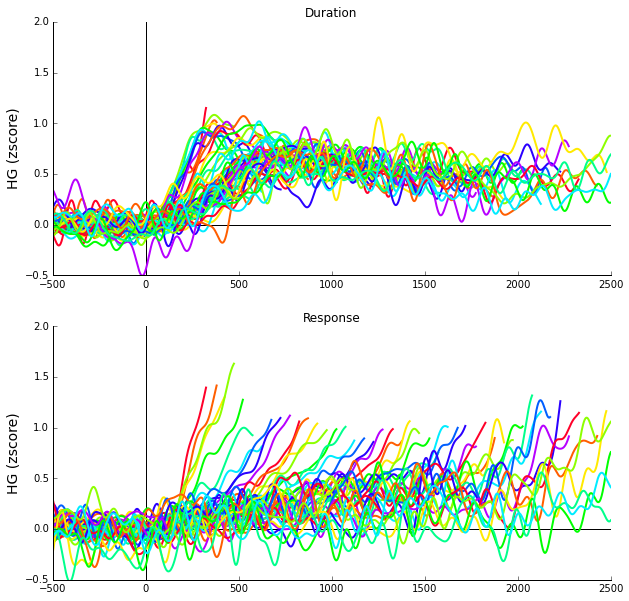

In [650]:
f, ax = plt.subplots(2, 1, figsize = (10,10))
colormap = plt.cm.gist_rainbow

for cnt in range(2):
    ax[cnt].axhline(y = 0, color = 'k', lw = 1)
    ax[cnt].axvline(x = 0, color = 'k', lw = 1)
    ax[cnt].autoscale(tight = True)
    ax[cnt].spines['top'].set_visible(False)
    ax[cnt].spines['right'].set_visible(False)
    ax[cnt].get_xaxis().tick_bottom()
    ax[cnt].get_yaxis().tick_left()
    ax[cnt].set_ylabel('HG (zscore)', fontsize = 14)
    ax[cnt].set_ylim([-0.5, 2])
    ax[cnt].set_xlim([-500, 2500])    
    ax[cnt].set_color_cycle([colormap(i) for i in np.linspace(0, .9, 10)])

ax[1].set_title('Response')
ax[0].set_title('Duration')

bins = np.arange(allRTs.min(), allRTs.max(), 50)
cnt = 0
start_i = 0
start_i_resp = 0
new_b = 0


data_resp_value, rts = [[] for i in range(2)]

for i, b in enumerate(bins):
    if i > 1:
        start_i = end_i+1
        start_i_resp = end_i_resp+1
    end_i = np.where(allRTs <= (b))[-1][-1]
    end_i_resp = np.where(allRTs_resp <= (b))[-1][-1] #define resp bins based on stimulus RTs
        
    previous_b = new_b #keep track of previous and current bin, for labeling
    new_b = b
    
    if len(np.arange(start_i, end_i+1))<100:
        continue
#     if ((i-1) % 5 != 0) & ( i > 0): #only plot every 3th one, starting with second one
#         continue
    
    RT = allRTs[start_i:end_i+1].mean()
    data = alldata[start_i:end_i+1,:RT+501] #cut off at RT
    RT_resp = allRTs_resp[start_i_resp:end_i_resp+1].mean()
    data_resp = alldata_resp[start_i_resp:end_i_resp+1,:RT_resp+501]
    
    data_resp_value.append(alldata_resp[start_i_resp:end_i_resp+1, RT_resp+501].mean())
    rts.append(RT_resp)
    
    ax[0].plot(np.arange(-500, data.shape[1]-500), data.mean(axis = 0), lw = 2)
#     sem = np.std(data, axis = 0)/np.sqrt(data.shape[0])
#     ax[0].fill_between(np.arange(-500, data.shape[1]-500), data.mean(axis = 0)+sem, data.mean(axis=0)-sem, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = 'r', label = None)

    ax[1].plot(np.arange(-500, data_resp.shape[1]-500), data_resp.mean(axis = 0), lw = 2, label = np.int(RT_resp))
#     sem = np.std(data_resp, axis = 0)/np.sqrt(data_resp.shape[0])
#     ax[1].fill_between(np.arange(-500, data_resp.shape[1]-500), data_resp.mean(axis = 0)+sem, data_resp.mean(axis=0)-sem, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = 'blue', label = None)
    
    
#     ax[cnt].axhline(y = 0, color = 'k', lw = 1)
#     ax[cnt].axvline(x = 0, color = 'k', lw = 1)
#     ax[cnt].autoscale(tight = True)
#     ax[cnt].spines['top'].set_visible(False)
#     ax[cnt].spines['right'].set_visible(False)
#     ax[cnt].get_xaxis().tick_bottom()
#     ax[cnt].get_yaxis().tick_left()
#     ax[cnt].set_ylabel('HG (zscore)', fontsize = 14)
#     ax[cnt].set_ylim([-0.5, 2.25])
#     ax[cnt].set_xlim([-500, 4000])   

    #cnt +=1

#ax[1].legend(loc = 'best')
#ax[1].axhline(y = 1, color = 'gray', lw = 2)

filename = os.path.join(savedir, 'binned_RTs_DDM.png')
plt.savefig(filename)

correlation between response trace value at RT and RT
R:-0.13 p:0.39


(array([  3.,  12.,   9.,   9.,   6.,   2.,   2.,   2.,   0.,   2.]),
 array([ 0.75816043,  0.84570237,  0.93324431,  1.02078625,  1.10832819,
         1.19587013,  1.28341207,  1.37095401,  1.45849595,  1.54603789,
         1.63357983]),
 <a list of 10 Patch objects>)

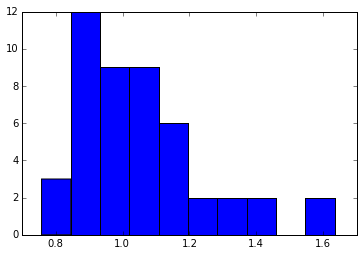

In [649]:
#plt.scatter(rts,data_resp_value)

print 'correlation between response trace value at RT and RT\nR:%.2f p:%.2f' %(stats.pearsonr(data_resp_value, rts))

np.median(data_resp_value)

hist(data_resp_value)

## resp locked images (DDM)

In [395]:
#load data (without my data, without SR)
p = 'D'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR.mat')
data_dict = loadmat.loadmat(filename)
alldata, allRTs, allsubjs, alltasks, alloffsets = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks', 'alloffsets']]

#sort data
i = np.argsort(allRTs)
allRTs = allRTs[i]
alldata = alldata[i,:]
allsubjs = allsubjs[i]
alltasks = alltasks[i]
alloffsets = alloffsets[i]

p = 'R'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR.mat')
data_dict = loadmat.loadmat(filename)
alldata_resp, allRTs_resp, allsubjs_resp, alltasks_resp, alloffsets_resp = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks', 'alloffsets']]

#sort data
i = np.argsort(allRTs_resp)
allRTs_resp = allRTs_resp[i]
alldata_resp = alldata_resp[i,:]
allsubjs_resp = allsubjs_resp[i]
alltasks_resp = alltasks_resp[i]
alloffsets_resp = alloffsets_resp[i]

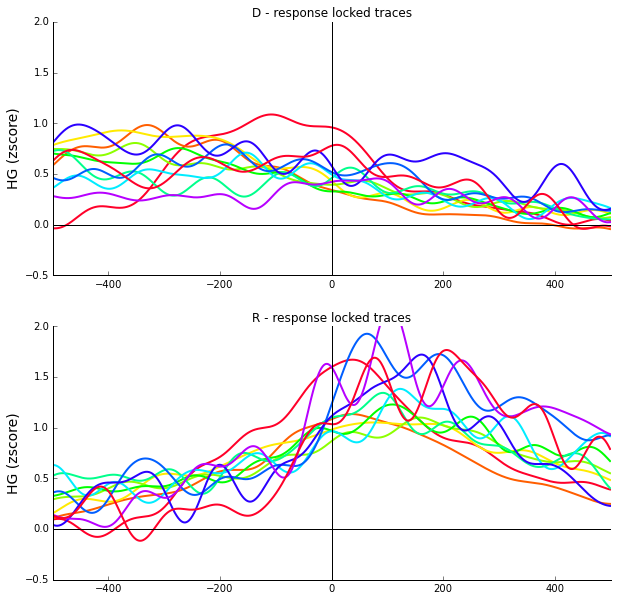

In [405]:
#create response locked data matrix
data = np.empty((alldata.shape[0], 1000))
for j, r in enumerate(allRTs):
    tmp = alldata[j, r + 500 - 500 : r + 500 + 500]
    data[j,:] = tmp
    
data_resp = np.empty((alldata_resp.shape[0], 1000))
for j, r in enumerate(allRTs_resp):
    tmp = alldata_resp[j, r + 500 - 500 : r + 500 + 500]
    data_resp[j,:] = tmp

bins = np.arange(allRTs.min(), allRTs.max(), 50)
start_i = 0
start_i_resp = 0
new_b = 0

f, ax = plt.subplots(2, 1, figsize = (10,10))
colormap = plt.cm.gist_rainbow

for cnt in range(2):
    ax[cnt].axhline(y = 0, color = 'k', lw = 1)
    ax[cnt].axvline(x = 0, color = 'k', lw = 1)
    ax[cnt].autoscale(tight = True)
    ax[cnt].spines['top'].set_visible(False)
    ax[cnt].spines['right'].set_visible(False)
    ax[cnt].get_xaxis().tick_bottom()
    ax[cnt].get_yaxis().tick_left()
    ax[cnt].set_ylabel('HG (zscore)', fontsize = 14)
    ax[cnt].set_ylim([-0.5, 2])
    ax[cnt].set_xlim([-500, 500])    
    ax[cnt].set_color_cycle([colormap(i) for i in np.linspace(0, .9, 10)])

ax[1].set_title('Response')
ax[0].set_title('Duration')

for i, b in enumerate(bins):
    if i > 1:
        start_i = end_i+1
        start_i_resp = end_i_resp+1
    end_i = np.where(allRTs <= (b))[-1][-1]
    end_i_resp = np.where(allRTs_resp <= (b))[-1][-1] #define resp bins based on stimulus RTs
        
    previous_b = new_b #keep track of previous and current bin, for labeling
    new_b = b
    
    if len(np.arange(start_i, end_i+1))<100:
        continue
    if ((i-1) % 5 != 3) & ( i > 0): #only plot every 3th one, starting with third one
        continue
    
    RT = allRTs[start_i:end_i+1].mean()
    data_b = data[start_i:end_i+1,:] #cut off at RT
    RT_resp = allRTs_resp[start_i_resp:end_i_resp+1].mean()
    data_resp_b = data_resp[start_i_resp:end_i_resp+1,:]
    
    ax[0].plot(np.arange(-500, 500), data_b.mean(axis = 0), lw = 2, zorder = 0)
    ax[1].plot(np.arange(-500, 500), data_resp_b.mean(axis = 0), lw = 2, zorder = 0)

#ax.plot(np.arange(-500, 500), mean(data, axis = 0), lw = 5, zorder = 100, color = 'k')

ax[0].set_title('D - response locked traces')
ax[1].set_title('R - response locked traces')


f.savefig(os.path.join(savedir, 'resp_locked_traces_binned_every5.png'))

#     ax[1].plot(np.arange(-500, data_resp.shape[1]-500), data_resp.mean(axis = 0), lw = 2, label = np.int(RT_resp))
#     sem = np.std(data_resp, axis = 0)/np.sqrt(data_resp.shape[0])
#     ax[1].fill_between(np.arange(-500, data_resp.shape[1]-500), data_resp.mean(axis = 0)+sem, data_resp.mean(axis=0)-sem, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = 'blue', label = None)
    

# overlap vs unique

In [127]:
stats.ttest_ind(diff_overlap, diff_unique)
stats.ttest_ind(diff_overlap, easy_overlap)


(-0.45737013204841687, 0.65287720350164657)

0.16059999999999999

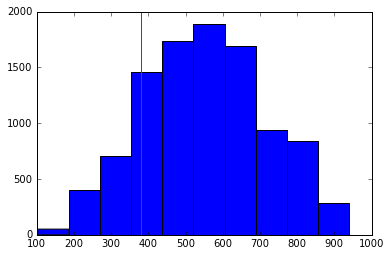

In [44]:
#load data
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'GP15_ovelapped_dur_elecs.csv')
df = pd.read_csv(filename)

#get unique and overlap
diff_unique = df.difficult_start_idx.iloc[df.unique_to_diff.dropna().index] #difficult unique elecs
diff_overlap = df.difficult_start_idx[df.difficult.isin(df.overlapped_elecs.dropna().values)] #difficult overlapped elecs
easy_overlap = df.easy_start_idx[df.easy.isin(df.overlapped_elecs.dropna().values)]


# permutation test for significance in onsets for overlap vs unique (GP15)
n_iter = 10000
surr = []
for n in range(n_iter):
    idx = np.random.permutation(range(0, len(diff_unique)))[0:len(diff_overlap)] 
    surr.append(diff_unique.iloc[idx].mean())
hist(surr)
plt.axvline(diff_overlap.mean(), color = 'r')
sum(diff_overlap.mean() > np.array(surr))/len(surr)

In [51]:
# onset times for the three overlap electrodes in EmoGen and EmoRep 
# (3 electrodes, 6 onsets total - one from each task for each electrode). 
# Take those and do Mann-Whitney U between these 6 values and onsets for unique in EmoGen

s = 'GP15'
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', s+'_ovelapped_dur_elecs.csv')
df = pd.read_csv(filename)

#get unique and overlap
diff_unique = df.difficult_start_idx.iloc[df.unique_to_diff.dropna().index] #difficult unique elecs
diff_overlap = df.difficult_start_idx[df.difficult.isin(df.overlapped_elecs.dropna().values)] #difficult overlapped elecs
easy_overlap = df.easy_start_idx[df.easy.isin(df.overlapped_elecs.dropna().values)]

overlap = diff_overlap.append(easy_overlap)

u, p = stats.mannwhitneyu(overlap, diff_unique)
print('mwu {0} - overlap vs diff unique : u={1}, p = {2}'.format(s, u, p))
  

mwu GP15 - overlap vs diff unique : u=19.0, p = 0.0874222168052


mwu JH2 - diff overlap vs easy_overlap : u=83.0, p = 0.076056939611
mwu JH2 - diff overlap vs diff unique : u=3.0, p = 0.00151409586591
mwu GP35 - diff overlap vs easy_overlap : u=46.0, p = 0.395630053202
mwu GP35 - diff overlap vs diff unique : u=15.0, p = 0.0285199371245
/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Figures
easy overlap n=32
diff overlap n=21
diff unique n=13


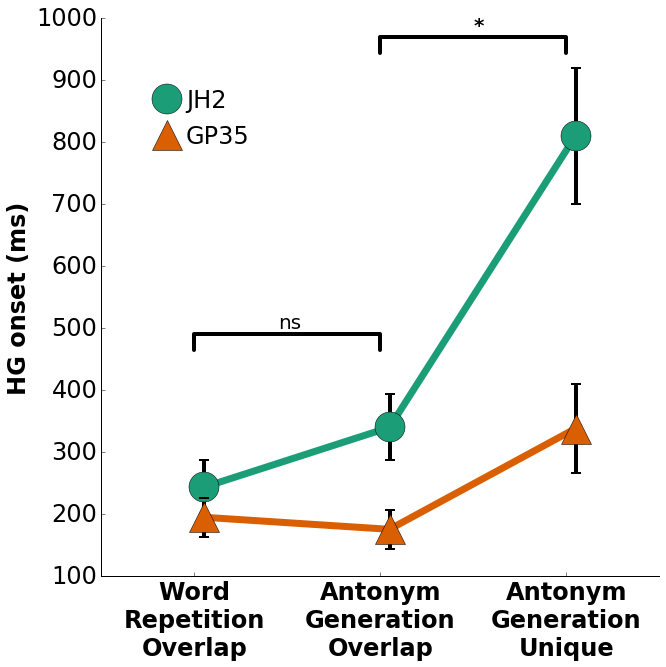

In [45]:
#make line graphs on 1 plot unique vs common for each subject - EmoGen / EmoRep
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

subjs = ['JH2','GP15','GP35']
f,ax = plt.subplots(1,1, figsize = (10,10))
ind = np.arange(3)
width = 0.35  
ax.patch.set_facecolor('white')
ax.autoscale(tight=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim([-.5, 2.5])
ax.set_ylim([100, 1000])

ax.yaxis.set_tick_params(labelsize = 24)
ax.set_ylabel('HG onset (ms)',weight = 'bold', fontsize = 24)
xTickMarks = ['Word\nRepetition\nOverlap','Antonym\nGeneration\nOverlap', 'Antonym\nGeneration\nUnique']
ax.set_xticks([0,1,2])
xtickNames = ax.set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')

markers = ['o', '^', 's']
colors = ['#1b9e77', '#d95f02', '#7570b3']

easy_overlap_n, diff_overlap_n, diff_unique_n = [0 for q in range(3)]
pvals = []

for i, s in enumerate(subjs):
    #load data
    filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', s+'_ovelapped_dur_elecs.csv')
    df = pd.read_csv(filename)

    #get unique and overlap
    diff_unique = df.difficult_start_idx.iloc[df.unique_to_diff.dropna().index] #difficult unique elecs
    diff_overlap = df.difficult_start_idx[df.difficult.isin(df.overlapped_elecs.dropna().values)] #difficult overlapped elecs
    easy_overlap = df.easy_start_idx[df.easy.isin(df.overlapped_elecs.dropna().values)]
    
    #plot
    x = (0.05, 1.05, 2.05)
    y = (easy_overlap.mean(), diff_overlap.mean(), diff_unique.mean())
    yerr = (easy_overlap.std()/np.sqrt(easy_overlap.dropna().shape[0]-1), diff_overlap.std()/np.sqrt(diff_overlap.shape[0]-1), diff_unique.std()/np.sqrt(diff_unique.shape[0]-1))
    #yerr = (easy_overlap.std(), diff_overlap.std(), diff_unique.std())
    
    ax.errorbar(x, y, yerr = yerr, fmt = '-', linewidth = 4, c = 'black', capsize=5, capthick=2)
    ax.plot(x, y, linestyle="solid", marker=markers[i], color = colors[i], linewidth  = 7, markersize =30, label = s)

    #ax[i].text(0.95, 0.05, 'p = %.3f' %(p), transform = ax[i].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')

    u, p = stats.mannwhitneyu(diff_overlap, easy_overlap)
    print('mwu {0} - diff overlap vs easy_overlap : u={1}, p = {2}'.format(s, u, p))

    u, p = stats.mannwhitneyu(diff_overlap, diff_unique)
    print('mwu {0} - diff overlap vs diff unique : u={1}, p = {2}'.format(s, u, p))
    pvals.append(p)
    
#     #rho, p = stats.spearmanr(diff_overlap, easy_overlap)
#     rho, p = stats.spearmanr(np.hstack((diff_overlap.values, easy_overlap.values)), np.hstack((np.ones_like(diff_overlap.values), np.ones_like(easy_overlap.values)*0)))
#     print( 'rank order corr\t{0}\teasy overlap vs diff overlap p = {1}'.format(s, p))
#     #rho, p = stats.spearmanr(diff_overlap, diff_unique)
#     rho, p = stats.spearmanr(np.hstack((diff_overlap.values, diff_unique.values)), np.hstack((np.ones_like(diff_overlap.values), np.ones_like(diff_unique.values)*0)))
#     print('rank order corr\t{0}\tdiff overlap vs diff unique p = {1}'.format(s, p))
    
    
#     t, p = stats.ttest_ind(diff_overlap, easy_overlap)
#     print( 'ttest {0}\teasy overlap vs diff overlap : {1}'.format(s, p))
#     t, p = stats.ttest_ind(diff_overlap, diff_unique)
#     print('ttest {0}\tdiff overlap vs diff unique : {1}'.format(s, p))
    
    
    
    easy_overlap_n += easy_overlap.shape[0]
    diff_overlap_n += diff_overlap.shape[0]
    diff_unique_n += diff_unique.shape[0]
    
    #print('easy overlap {0} n={1}'.format(s, easy_overlap.shape[0]))
    #print('diff overlap {0} n={1}'.format(s, diff_overlap.shape[0]))
    #print('diff unique {0} n={1}'.format(s, diff_unique.shape[0]))
    
    
ax.legend(fontsize = 24, loc = (0.1,0.75), frameon=False)

props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':40,'shrinkB':40,'lw':4}


# #label = "%s\n" r"$p$" " =%.2f" %(subjs[0], pvals[0])
# #ax.annotate(label, xy=(.85,780), zorder=10, fontsize = 20)
# #ax.annotate('%s\np=%.2f' %(subjs[0],pvals[0]), xy=(.85,780), zorder=10, fontsize = 20)
# ax.annotate('', xy=(1, 700), xytext=(2,700), arrowprops=props)

# #label = "%s\n" r"$p$" " =%.2f" %(subjs[1], pvals[1])
# #ax.annotate(label, xy=(1.3,780), zorder=10, fontsize = 20)
# #ax.annotate('%s\np=%.2f' %(subjs[1],pvals[1]), xy=(1.3,780), zorder=10, fontsize = 20)
# ax.annotate('', xy=(1, 700), xytext=(2,700), arrowprops=props)

#label = "%s\n" r"$p$" " =%.2f" %(subjs[2], pvals[2])
#ax.annotate(label, xy=(1.75,780), zorder=10, fontsize = 20)
#ax.annotate('%s\np=%.2f' %(subjs[2],pvals[2]), xy=(1.75,780), zorder=10, fontsize = 20)
ax.annotate('', xy=(1, 880), xytext=(2,880), arrowprops=props)

ax.annotate('*', xy = (1.5, 980), zorder = 10, fontsize = 20, fontweight = 'bold')

ax.annotate('ns', xy=(.45,500), zorder=10, fontsize = 20)
ax.annotate('', xy=(0, 400), xytext=(1,400), arrowprops=props)


filename = os.path.join(savedir, 'unique_vs_overlap_1plot_star_relabeled_EmoRep.png')
plt.savefig(filename, dpi = 150)
print savedir

print 'easy overlap n=%i' %( easy_overlap_n)
print 'diff overlap n=%i' %( diff_overlap_n)
print 'diff unique n=%i' %( diff_unique_n)


In [63]:
## duration elecs in emogen that also active in emorep
subj, task = ('JH2', 'EmoRep')
filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent.mat')
data = loadmat.loadmat(filename)
elecs_emorep = data['active_elecs']


filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)
elecs_emogen = df.query("subj == 'JH2' and task == 'EmoGen' and pattern == 'D'")[['elec','start_idx']]

print (np.intersect1d(elecs_emorep, elecs_emogen.elec))


[  2   3   4  12  13  14  20  26  27  28 134]


In [65]:
print elecs_emogen
print elecs_emorep

     elec  start_idx
458     1        802
459     2        219
460     3        216
461     4        529
462     5        872
463    11        924
464    12        355
465    13         29
466    14        312
467    15        661
468    16        441
469    18       1161
470    20        295
473    26        547
474    27        599
475    28        373
482   134        267
[  2   3   4   7  12  13  14  20  21  22  26  27  28  31  32  38  39  40
  48 131 133 134]


SpearmanrResult(correlation=0.32387513781564786, pvalue=0.25863022385012585)


(-1, 2)

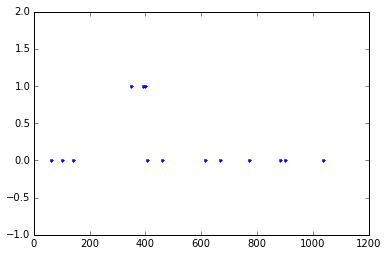

In [395]:

print stats.spearmanr(np.hstack((diff_overlap.values, diff_unique.values)), np.hstack((np.zeros_like(diff_overlap.values), np.ones_like(diff_unique.values))))

plt.plot(np.hstack((diff_overlap.values, diff_unique.values)), np.hstack((np.ones_like(diff_overlap.values), np.ones_like(diff_unique.values)*0)), '.')
plt.ylim([-1, 2])


easy overlap n=20
diff overlap n=20
diff unique n=28


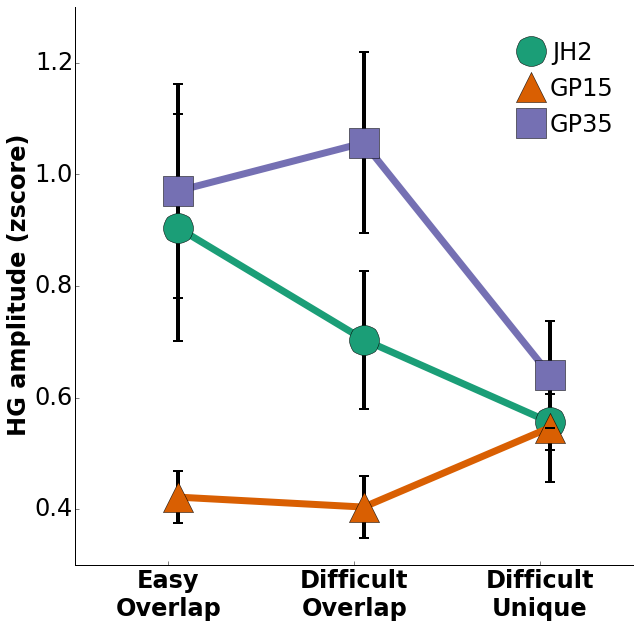

In [221]:
# amplitude of unique vs overlap elecs
# mean amplitude in the activation window for each elec averaged for the three categories
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)
dfstack = pd.DataFrame()
savedir = os.path.join(SJdir, 'PCA', 'Figures')
bl_st = -500
subjtasklist = [('JH2', 'SelfAud','EmoGen'),('GP15','EmoRep','EmoGen'),('GP35', 'EmoRep','EmoGen')]


matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

f,ax = plt.subplots(1,1, figsize = (10,10))
ind = np.arange(3)
width = 0.35  
ax.patch.set_facecolor('white')
ax.autoscale(tight=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim([-.5, 2.5])
#ax.set_ylim([100, 800])

ax.yaxis.set_tick_params(labelsize = 24)
ax.set_ylabel('HG amplitude (zscore)',weight = 'bold', fontsize = 24)
xTickMarks = ['Easy\nOverlap','Difficult\nOverlap', 'Difficult\nUnique']
ax.set_xticks([0,1,2])
xtickNames = ax.set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')

markers = ['o', '^', 's']
colors = ['#1b9e77', '#d95f02', '#7570b3']

easy_overlap_n, diff_overlap_n, diff_unique_n = [0 for q in range(3)]


for i, d in enumerate(subjtasklist):
    subj, easy_task, diff_task = d
    
    #load data
    filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', subj+'_ovelapped_dur_elecs.csv')
    dfvals = pd.read_csv(filename)
    
    #get unique and overlap elecs
    diff_unique = dfvals.unique_to_diff.dropna().values #difficult unique elecs
    diff_unique = [str(int(x)) for x in diff_unique]

    diff_overlap = dfvals.difficult[dfvals.difficult.isin(dfvals.overlapped_elecs.dropna().values)].values #difficult overlapped elecs
    diff_overlap = [str(int(x)) for x in diff_overlap]
    
    easy_overlap = dfvals.easy[dfvals.easy.isin(dfvals.overlapped_elecs.dropna().values)].values
    easy_overlap = [str(int(x)) for x in easy_overlap]
    
    #mean value per trial
    datadir = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'zscore', 'csv_files')
    dfmean_easy = pd.read_csv(os.path.join(datadir, '%s_%s_means.csv' %(subj, easy_task)))
    dfmean_easy = dfmean_easy[easy_overlap].mean(axis = 0) #mean val per elec
    
    dfmean_diff = pd.read_csv(os.path.join(datadir, '%s_%s_means.csv' %(subj, diff_task)))
    dfmean_diff_overlap = dfmean_diff[diff_overlap].mean(axis = 0) #mean val per elec
    dfmean_diff_unique = dfmean_diff[diff_unique].mean(axis = 0) #mean val per elec

    #plot
    x = (0.05, 1.05, 2.05)
    y = (dfmean_easy.mean(), dfmean_diff_overlap.mean(), dfmean_diff_unique.mean())
    yerr = (dfmean_easy.std()/np.sqrt(dfmean_easy.dropna().shape[0]-1), dfmean_diff_overlap.std()/np.sqrt(dfmean_diff_overlap.shape[0]-1), dfmean_diff_unique.std()/np.sqrt(dfmean_diff_unique.shape[0]-1))
    #yerr = (easy_overlap.std(), diff_overlap.std(), diff_unique.std())
    
    ax.errorbar(x, y, yerr = yerr, fmt = '-', linewidth = 4, c = 'black', capsize=5, capthick=2)
    ax.plot(x, y, linestyle="solid", marker=markers[i], color = colors[i], linewidth  = 7, markersize =30, label = subj)

    u, p = stats.mannwhitneyu(dfmean_diff_overlap, dfmean_diff_unique)
    #ax[i].text(0.95, 0.05, 'p = %.3f' %(p), transform = ax[i].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')


    easy_overlap_n += dfmean_easy.shape[0]
    diff_overlap_n += dfmean_diff_overlap.shape[0]
    diff_unique_n += dfmean_diff_unique.shape[0]  

ax.legend(fontsize = 24, loc = (0.8,0.75), frameon=False)

'''
props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':40,'shrinkB':40,'lw':4}

ax.annotate('*', xy=(1.5,775), zorder=10, fontsize = 24, weight = 'bold')
ax.annotate('', xy=(1, 700), xytext=(2,700), arrowprops=props)

ax.annotate('ns', xy=(.4,475), zorder=10, fontsize = 24, weight = 'bold')
ax.annotate('', xy=(0, 400), xytext=(1,400), arrowprops=props)

'''

#filename = os.path.join(savedir, 'unique_vs_overlap_1plot.png')
#plt.savefig(filename)
#print savedir

print 'easy overlap n={0}'.format(easy_overlap_n)
print 'diff overlap n={0}'.format(diff_overlap_n)
print 'diff unique n={0}'.format(diff_unique_n)


In [108]:
def get_ROI(subj, e, brain_ROI, task = None):
    '''
    Returns an ROI for a given subj and elec.
    If subject is GP35 then must give a task argument so knows which ROIs to pull
    '''
    
    if (subj == 'GP35') & ((task == 'EmoRep') | (task == 'EmoGen')):
        subj = 'GP35_words'
    elif (subj == 'GP35') & ((task == 'FaceEmo') | (task == 'FaceGen')):
        subj = 'GP35_face'
    
    try:
        rois = brain_ROI[subj]
    except:
        return None
    else:
        for roi, elecs in rois.iteritems():
            if np.in1d(e, elecs):
                return roi

## OLD

In [ ]:
# correlations from intersect sheet
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Dur_Resp_trace_summary_final_v2.xlsx')
df = pd.read_excel(filename)

'''
t1 - time at which duration and resp traces start to separate
t2 - time at which duration and resp traces come together before resp ramps up
t3 - time at which duration and resp traces come together again
'''

f, ax = plt.subplots(5,3, figsize = (20,30))
ax = ax.flatten()

ax[0].scatter(df['bin/RT'], df['bin/RT'] - df['t2 (last cross) ms'])
ax[0].set_xlabel('RTs')
ax[0].set_ylabel('Lag (RTs - t2)\nlast crossing')
ax[0].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'] - df['t2 (last cross) ms'],  df['bin/RT'])))

ax[1].scatter(df['bin/RT'], df['AUC D>R (t1:t2)'])
ax[1].set_xlabel('RTs')
ax[1].set_ylabel('AUC D>R (t1:t2)')
ax[1].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['AUC D>R (t1:t2)'])))

ax[2].scatter(df['bin/RT'], df['AUC dur (t1:t2)'])
ax[2].set_xlabel('RTs')
ax[2].set_ylabel('AUC dur (t1:t2)')
ax[2].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['AUC dur (t1:t2)'])))

ax[3].scatter(df['bin/RT'], df['AUC resp (t2:t3)'])
ax[3].set_xlabel('RTs')
ax[3].set_ylabel('AUC resp (t2:t3)')
ax[3].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['AUC resp (t2:t3)'])))

ax[4].scatter(df['bin/RT'], df['bin/RT'] - df['dur peak lat ms'])
ax[4].set_xlabel('RTs')
ax[4].set_ylabel('Lag (RT - duration peak latency)')
ax[4].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['bin/RT'] - df['dur peak lat ms'])))

ax[5].scatter(df['bin/RT'], df['resp peak lat ms']- df['bin/RT'])
ax[5].set_xlabel('RTs')
ax[5].set_ylabel('Lag (response peak latency - RT)')
ax[5].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['resp peak lat ms']- df['bin/RT'])))

ax[6].scatter(df['bin/RT'], df['peak amp'])
ax[6].set_xlabel('RTs')
ax[6].set_ylabel('duration peak amplitude')
ax[6].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['peak amp'])))

ax[7].scatter(df['bin/RT'], df['resp peak amp'])
ax[7].set_xlabel('RTs')
ax[7].set_ylabel('response peak amplitude')
ax[7].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['resp peak amp'])))

ax[8].scatter(df['1st dur peak lat ms'], df['last dur peak lat ms'])
ax[8].set_xlabel('1st dur peak lat ms')
ax[8].set_ylabel('last dur peak lat ms')
ax[8].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['1st dur peak lat ms'], df['last dur peak lat ms'])))

ax[9].scatter(df['bin/RT'], df['t2 (last cross) ms'])
ax[9].set_xlabel('RTs')
ax[9].set_ylabel('t2 (last crossing)')
ax[9].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['t2 (last cross) ms'])))

ax[10].scatter(df['bin/RT'], df['last dur peak lat ms'])
ax[10].set_xlabel('bin/RT')
ax[10].set_ylabel('last dur peak lat ms')
ax[10].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['last dur peak lat ms'])))

ax[11].scatter(df['bin/RT'], df['1st dur peak lat ms'])
ax[11].set_xlabel('bin/RT')
ax[11].set_ylabel('1st dur peak lat ms')
ax[11].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['1st dur peak lat ms'])))

ax[12].scatter(df['bin/RT'], df['AUC R>D (t2:t3)'])
ax[12].set_xlabel('bin/RT')
ax[12].set_ylabel('AUC R>D (t2:t3)')
ax[12].set_title('R = %.3f, p =%.3f' %(stats.pearsonr(df['bin/RT'], df['AUC R>D (t2:t3)'])))


filename = os.path.join(savedir, 'trace_data_correlations.png')
plt.savefig(filename)

##for meeting - selected plots
'''
t2 with RT
las dur peak lat with RT
lag RT-t2 (updated) with RT
AUC dur with RT (not AUC D>R)
dur peak amp with RT
AUC reps with RT
reps peak amp with RT
'''

# correlations from intersect sheet
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Dur_Resp_trace_summary_final_v2.xlsx')
df = pd.read_excel(filename)

'''
t1 - time at which duration and resp traces start to separate
t2 - time at which duration and resp traces come together before resp ramps up
t3 - time at which duration and resp traces come together again


Slide 1: RT with t2, RT with last peak, and RT with lag of RT-t2
Slide 2: peak and AUC amp for duration
Slide 3: peak and AUC amp for resp
'''

f, ax = plt.subplots(1,3, figsize = (20,7))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 14)
    ax[i].yaxis.set_tick_params(labelsize = 14)


ax[0].scatter(df['bin/RT'], df['t2 (last cross) ms'], s = 45)
ax[0].set_xlabel('RTs', weight = 'bold', fontsize = 14)
ax[0].set_ylabel('ms', weight = 'bold', fontsize = 14)
ax[0].set_title('t2 (last crossing)', weight = 'bold', fontsize = 14)
ax[0].annotate('R = %.3f\np =%.3f' %(stats.pearsonr(df['bin/RT'], df['t2 (last cross) ms'])),xy = (2500, 250), weight = 'bold', fontsize = 14)

ax[1].scatter(df['bin/RT'], df['last dur peak lat ms'], s = 45)
ax[1].set_xlabel('RTs', weight = 'bold', fontsize = 14)
ax[1].set_ylabel('ms', weight = 'bold', fontsize = 14)
ax[1].set_title('last duration peak latency', weight = 'bold', fontsize = 14)
ax[1].annotate('R = %.3f\np =%.3f' %(stats.pearsonr(df['bin/RT'], df['last dur peak lat ms'])), xy = (2500, 250), weight = 'bold', fontsize = 14)

ax[2].scatter(df['bin/RT'], df['bin/RT'] - df['t2 (last cross) ms'], s = 45)
ax[2].set_xlabel('RTs', weight = 'bold', fontsize = 14)
ax[2].set_ylabel('ms', weight = 'bold', fontsize = 14)
ax[2].set_title('Lag (RTs - t2 last crossing)', weight = 'bold', fontsize = 14)
ax[2].annotate('R = %.3f\np =%.3f' %(stats.pearsonr(df['bin/RT'] - df['t2 (last cross) ms'],  df['bin/RT'])), xy = (2500, 50), weight = 'bold', fontsize = 14)

filename = os.path.join(savedir, 'trace_data_correlations_RT_t2_lastpeak.png')
plt.savefig(filename)

f, ax = plt.subplots(1,2, figsize = (20,10))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 14)
    ax[i].yaxis.set_tick_params(labelsize = 14)

ax[0].scatter(df['bin/RT'], df['AUC dur (t1:t2)'], s = 45)
ax[0].set_xlabel('RTs', weight = 'bold', fontsize = 14)
ax[0].set_ylabel('HG (zscore)', weight = 'bold', fontsize = 14)
ax[0].set_title('AUC dur (t1:t2)', weight = 'bold', fontsize = 14)
ax[0].annotate('R = %.3f\np =%.3f' %(stats.pearsonr(df['bin/RT'], df['AUC dur (t1:t2)'])), xy = (2500, -100), weight = 'bold', fontsize = 14)

ax[1].scatter(df['bin/RT'], df['peak amp'], s = 45)
ax[1].set_xlabel('RTs', weight = 'bold', fontsize = 14)
ax[1].set_ylabel('HG (zscore)', weight = 'bold', fontsize = 14)
ax[1].set_title('duration peak amplitude', weight = 'bold', fontsize = 14)
ax[1].annotate('R = %.3f\np =%.3f' %(stats.pearsonr(df['bin/RT'], df['peak amp'])), xy = (2500, 0.65), weight = 'bold', fontsize = 14)

filename = os.path.join(savedir, 'trace_data_correlations_AUC_peak_dur.png')
plt.savefig(filename)

f, ax = plt.subplots(1,2, figsize = (20,10))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 14)
    ax[i].yaxis.set_tick_params(labelsize = 14)
    
    
ax[0].scatter(df['bin/RT'], df['AUC resp (t2:t3)'], s = 45)
ax[0].set_xlabel('RTs', weight = 'bold', fontsize = 14)
ax[0].set_title('AUC resp (t2:t3)', weight = 'bold', fontsize = 14)
ax[0].set_ylabel('HG (zscore)', weight = 'bold', fontsize = 14)
ax[0].annotate('R = %.3f\np =%.3f' %(stats.pearsonr(df['bin/RT'], df['AUC resp (t2:t3)'])), xy = (2500, 350), weight = 'bold', fontsize = 14)

ax[1].scatter(df['bin/RT'], df['resp peak amp'], s = 45)
ax[1].set_xlabel('RTs', weight = 'bold', fontsize = 14)
ax[1].set_ylabel('HG (zscore)', weight = 'bold', fontsize = 14)
ax[1].set_title('response peak amplitude', weight = 'bold', fontsize = 14)
ax[1].annotate('R = %.3f\np =%.3f' %(stats.pearsonr(df['bin/RT'], df['resp peak amp'])), xy = (2500, 0.9), weight = 'bold', fontsize = 14)

filename = os.path.join(savedir, 'trace_data_correlations_AUC_peak_resp.png')
plt.savefig(filename)


In [7]:
from math import floor, log10

# Don't use LaTeX as text renderer to get text in true LaTeX
# If the two following lines are left out, Mathtext will be used
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}

plt.rcParams.update(params)

# Define function for string formatting of scientific notation
#from http://stackoverflow.com/questions/18311909/how-do-i-annotate-with-power-of-ten-formatting
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if not exponent:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if not precision:
        precision = decimal_digits

    #return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)
    return r"${0:.{2}f}\times10^{{{1:d}}}$".format(coeff, exponent, precision)
    #return r"${0:.{2}f}e^{{{1:d}}}$".format(coeff, exponent, precision)
    #return r'$%.2f x 10^%d$' %(coeff, exponent)

In [533]:
sci_notation(100000)

'$1.0\\cdot10^{5}$'

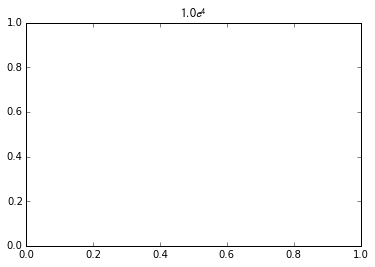

In [520]:
f, ax = plt.subplots()
ax.set_title('%s' %(sci_notation(10000, exponent = False)))


## bin by ROI regression


In [84]:
from utils.sci_notation import sci_notation

In [85]:
base = '/home/knight/matar/MATLAB/DATA/Avgusta/PCA/'

In [86]:
filename = os.path.join(base, 'csvs_FINAL', 'ROI_crosses.csv')
df = pd.read_csv(filename)


# filename = os.path.join(base, 'Figures', 'binned_RTs_withresp.csv')
# df_values = pd.read_csv(filename)
# df_values['RT'] = df_values.rts.apply(np.floor).astype(int)


/home/knight/matar/MATLAB/DATA/Avgusta/PCA/bins/byROI/crossover_regressions.png


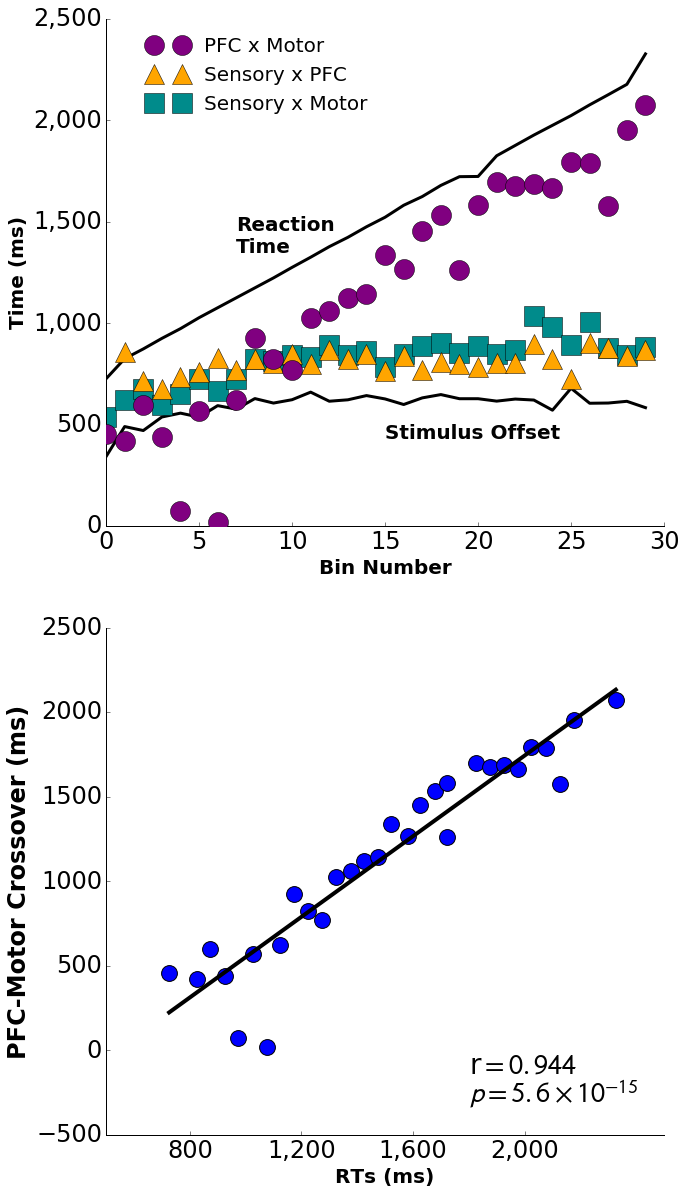

In [92]:
#plot
f, ax = plt.subplots(2,1, figsize = (10,20))
ax = ax.flatten()
fs = 20

#extract values (axis 0)
rts = df['RT']
pfc_motor = df['PFC_Motor_Cross_automatic']
pfc_sensory = df['Sensory_PFC_cross'].values.astype('int')[1:] #first is blank
sensory_motor = df['Sensory_Motor_cross']
offsets = df['offsets']

line, = ax[0].plot(df.index, rts, lw = 3, color = 'k', label = '_nolegend_')
t = ax[0].annotate('Reaction\nTime', xy = (7,1350), color= 'k', fontsize = fs, fontweight = 'bold')
ax[0].plot(df.index, offsets, lw = 3, color = 'k', label = '_nolegend_')
ax[0].annotate('Stimulus Offset', xy = (15,430), color= 'k', fontsize = fs, fontweight = 'bold')
ax[0].plot(df.index, pfc_motor, 'o', color = 'purple', markersize = 20, label = 'PFC x Motor', zorder = 10)
ax[0].plot(df.index[1:], pfc_sensory, '^', markersize = 20, color = 'orange', label = 'Sensory x PFC', zorder = 8)
ax[0].plot(df.index, sensory_motor, 's', markersize = 20, color = 'darkcyan', label = 'Sensory x Motor')
ax[0].set_xlabel('Bin Number',weight = 'bold', fontsize = fs)
ax[0].set_ylabel('Time (ms)',weight = 'bold', fontsize = fs)
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

handles, labels = ax[0].get_legend_handles_labels()
lgnd = ax[0].legend(handles, labels, bbox_to_anchor=(.5,1), frameon = False, fontsize = 20)

ax[1].scatter(rts, pfc_motor, marker = 'o', s=250)
ax[1].set_ylabel('PFC-Motor Crossover (ms)',weight = 'bold', fontsize = 24)
R, p = stats.pearsonr(rts, pfc_motor)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(pfc_motor))[0]
ax[1].plot(rts, rts*m+c, color = 'k', linewidth = 4)
ax[1].text(0.65, 0.11, r"r$ = {%.3f}$" %(R), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[1].text(0.65, 0.05, r"$p = $%s" %(sci_notation(p)), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# ax[2].scatter(rts[1:], pfc_sensory, marker = 'o', s=250)
# ax[2].set_ylabel('PFC-Sensory Crossover (ms)',weight = 'bold', fontsize = 24)
# R, p = stats.pearsonr(rts[1:], pfc_sensory)
# A = np.vstack([rts[1:],np.ones(len(rts[1:]))]).T
# m,c = np.linalg.lstsq(A,np.array(pfc_sensory))[0]
# ax[2].plot(rts[1:], rts[1:]*m+c, color = 'k', linewidth = 4)
# ax[2].text(0.65, 0.11, r"r$ = {%.3f}$" %(R), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
# ax[2].text(0.65, 0.05, r"$p = $%s" %(sci_notation(p)), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
# ax[2].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# ax[3].scatter(rts, sensory_motor, marker = 'o', s=250)
# ax[3].set_ylabel('Sensory-Motor Crossover (ms)',weight = 'bold', fontsize = 24)
# R, p = stats.pearsonr(rts, sensory_motor)
# A = np.vstack([rts,np.ones(len(rts))]).T
# m,c = np.linalg.lstsq(A,np.array(sensory_motor))[0]
# ax[3].plot(rts, rts*m+c, color = 'k', linewidth = 4)
# ax[3].text(0.65, 0.11, r"r$ = {%.3f}$" %(R), transform = ax[3].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
# ax[3].text(0.65, 0.05, r"$p = $%s" %(sci_notation(p)), transform = ax[3].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
# ax[3].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for i in np.arange(0,2):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 24)
    ax[i].yaxis.set_tick_params(labelsize = 24)

for i in [1]:#, 2, 3]:    
    ax[i].set_xlabel('RTs (ms)',weight = 'bold', fontsize = 20)
    ax[i].set_xticks(np.arange(800, 2400, 400))

#f.subplots_adjust(wspace = 0.35)
    
filename = os.path.join(base, 'bins','byROI', 'crossover_regressions.png')
f.savefig(filename,bbox_inches='tight', dpi = 150)
print filename